<a href="https://colab.research.google.com/github/aldrichch/predicting-booking-cancelation/blob/main/Predicting_Booking_Cancelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Booking Cancelation**

In today's dynamic hospitality industry, the ability to anticipate and mitigate booking cancellations is important for optimizing revenue and enhancing guest satisfaction. To address this challenge, I embarked on a project to develop a predictive model using Python. By leveraging historical booking data and employing advanced machine learning techniques, my goal was to accurately forecast which bookings are likely to be canceled. This project aimed to provide hoteliers with valuable insights to proactively manage their inventory, allocate resources efficiently, and ultimately improve operational efficiency and guest experiences.

In [ ]:
# Libraries
import requests
import numpy as np
import pandas as pd
import plotly as py
import seaborn as sns
import statsmodels.api as sm
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import statsmodels.stats.api as sms

from math import sqrt
from PIL import Image
from io import BytesIO
from scipy import stats
from datetime import datetime
from scipy.stats import zscore
from sklearn.cluster import KMeans

from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.stattools import adfuller
from yellowbrick.cluster import KElbowVisualizer
from statsmodels.tools.tools import add_constant
from sklearn.ensemble import RandomForestClassifier
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split
from sklearn.metrics import (f1_score, accuracy_score, recall_score, precision_score, confusion_matrix, mean_absolute_error, mean_squared_error,
                             roc_auc_score, precision_recall_curve, roc_curve, make_scorer, silhouette_score, ConfusionMatrixDisplay)

# Dataset

In [ ]:
# Import the dataset
df = pd.read_csv("INNHotelsGroup.csv")

In [ ]:
data = df.copy()

In [ ]:
data

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                           0   
1                      3      Not Selected                           0   
2                      1       Meal Plan 1                           0   
3                      2       Meal Plan 1                           0   
4                      1      Not Selected                           0   
...                  ...               ...                         ...   
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
0            Room_Type 1        224          2017             10   
1            Room_Type 1          5          2018             11   
2            Room_Type 1          1          2018              2   
3            Room_Type 1        211          2018              5   
4            Room_Type 1         48          2018              4   
...                  ...        ...           ...            ...   
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
0                 2             Offline               0   
1                 6              Online               0   
2                28              Online               0   
3                20              Online               0   
4                11              Online               0   
...             ...                 ...             ...   
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
...                             ...                                   ...   
36270                             0                                     0   
36271                             0                                     0   
36272                            

In [ ]:
# Check the missing value
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [ ]:
# Show the columns
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [ ]:
# Check the data type
data.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [ ]:
data.shape

(36275, 19)

In [ ]:
# Encode booking status column
status_map = {'Canceled': 0, 'Not_Canceled': 1}
data['booking_status'].replace(status_map, inplace=True)

# Exploratory Data Analysis

In [ ]:
# Statistics Descriptive
data.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                36275.000000  36275.000000  36275.000000   36275.000000   
mean                     0.030986     85.232557   2017.820427       7.423653   
std                      0.173281     85.930817      0.383836       3.069894   
min                      0.000000      0.000000   2017.000000       1.000000   
25%                      0.000000     17.000000   2018.000000       5.000000   
50%                      0.000000     57.000000   2018.000000       8.000000   
75%                      0.000000    126.000000   2018.000000      10.000000   
max                      1.000000    443.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count  36275.000000    36275.000000                  36275.000000   
mean      15.596995        0.025637                      0.023349   
std        8.740447        0.158053                      0.368331   
min        1.000000        0.000000                      0.000000   
25%        8.000000        0.000000                      0.000000   
50%       16.000000        0.000000                      0.000000   
75%       23.000000        0.000000                      0.000000   
max       31.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          36275.000000        36275.000000   
mean                               0.153411          103.423539   
std                                1.754171           35.089424   
min                                0.000000            0.000000   
25%                                0.000000           80.300000   
50%                                0.000000           99.450000   
75%                                0.000000          120.000000   
max                               58.000000          540.000000   

       no_of_special_requests  booking_status  
count            36275.000000    36275.000000  
mean                 0.619655        0.672364  
std                  0.786236        0.469358  
min                  0.000000        0.000000  
25%                  0.000000        0.000000  
50%                  0.000000        1.000000  
75%                  1.000000        1.000000  
max                  5.000000        1.000000

## Univariate Analysis

### Weekend Nights and Weekday Nights

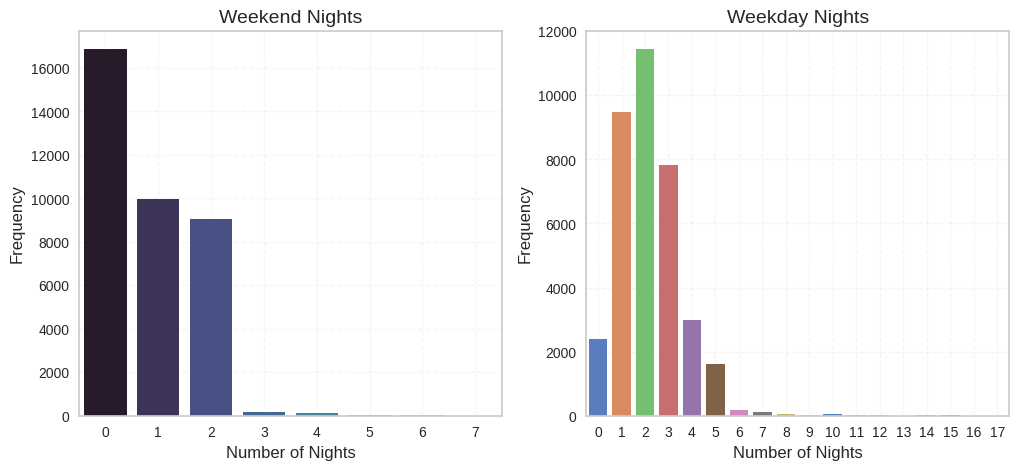

In [ ]:
# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='no_of_weekend_nights', data=data, palette="mako", ax=axes[0])
axes[0].set_title('Weekend Nights', fontsize = 14)
axes[0].set_xlabel('Number of Nights', fontsize = 12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels())
axes[0].grid(True, linestyle='--', alpha=0.2)

sns.countplot(x='no_of_week_nights', data=data, palette="muted", ax=axes[1])
axes[1].set_title('Weekday Nights', fontsize=14)
axes[1].set_xlabel('Number of Nights', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_xticklabels(axes[1].get_xticklabels())
axes[1].grid(True, linestyle='--', alpha=0.2)

plt.show()

In [ ]:
# weekend_counts = data['no_of_weekend_nights'].value_counts(normalize=True, dropna=False)
# weekday_counts = data['no_of_week_nights'].value_counts(normalize=True, dropna=False)
# print(weekday_counts, weekend_counts)

### Meal Plan and Required Car Parking Space

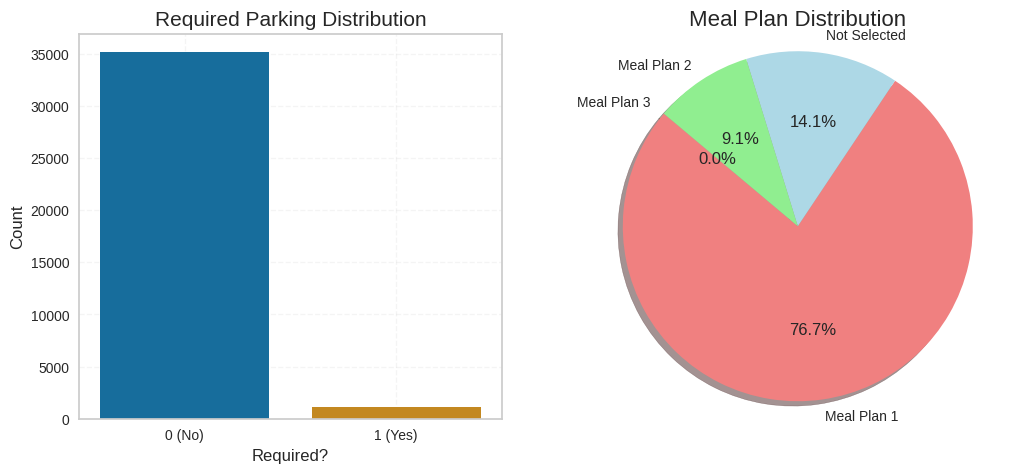

In [ ]:
# Counts
meal_counts = data['type_of_meal_plan'].value_counts(normalize=True, dropna=False)
parking_counts = data['required_car_parking_space'].value_counts(normalize=True, dropna=False)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='required_car_parking_space', data=data, palette="colorblind", ax=axes[0])
axes[0].set_title('Required Parking Distribution', fontsize=15)
axes[0].set_xlabel('Required?', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['0 (No)', '1 (Yes)'])
axes[0].set_xticklabels(axes[0].get_xticklabels())
axes[0].grid(True, linestyle='--', alpha=0.2)

meal_colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightsalmon']
meal_label = meal_counts.index

axes[1].pie(meal_counts, labels=meal_label, colors=meal_colors, autopct='%1.1f%%', shadow=True, startangle=140)
axes[1].set_title('Meal Plan Distribution', fontsize=16)
axes[1].axis('equal')

plt.show()

### Room and Market Segment Types

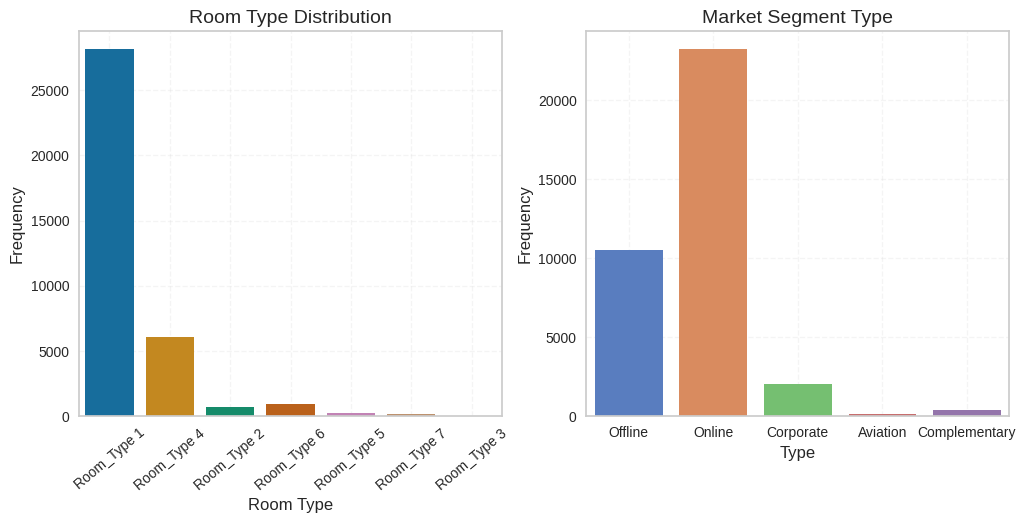

In [ ]:
# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='room_type_reserved', data=data, palette="colorblind", ax=axes[0])
axes[0].set_title('Room Type Distribution', fontsize = 14)
axes[0].set_xlabel('Room Type', fontsize = 12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=40)
axes[0].grid(True, linestyle='--', alpha=0.2)

sns.countplot(x='market_segment_type', data=data, palette="muted", ax=axes[1])
axes[1].set_title('Market Segment Type', fontsize=14)
axes[1].set_xlabel('Type', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_xticklabels(axes[1].get_xticklabels())
axes[1].grid(True, linestyle='--', alpha=0.2)

plt.show()

In [ ]:
room_type_counts = data['room_type_reserved'].value_counts(normalize=True, dropna=False)
market_segment_counts = data['market_segment_type'].value_counts(normalize=True, dropna=False)
print(room_type_counts, market_segment_counts)

Room_Type 1    0.775465
Room_Type 4    0.166975
Room_Type 6    0.026630
Room_Type 2    0.019076
Room_Type 5    0.007305
Room_Type 7    0.004356
Room_Type 3    0.000193
Name: room_type_reserved, dtype: float64 Online           0.639945
Offline          0.290227
Corporate        0.055603
Complementary    0.010779
Aviation         0.003446
Name: market_segment_type, dtype: float64


### Repeated Guest

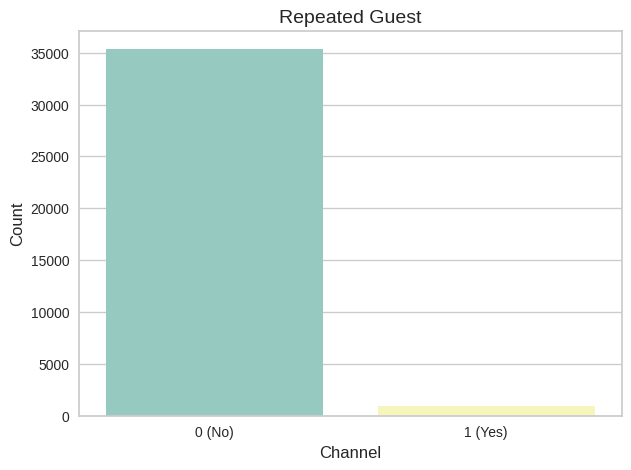

In [ ]:
# Plot
plt.figure(figsize=(7, 5))
sns.countplot(x='repeated_guest', data=data, palette="Set3")
plt.title('Repeated Guest', fontsize=14)
plt.xticks([0, 1], ['0 (No)', '1 (Yes)'])
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

### Arrival Date

In [ ]:
# Data transformation
data['date'] = pd.to_datetime(data['arrival_year'].astype(str) + '-' + data['arrival_month'].astype(str) + '-' + data['arrival_date'].astype(str), errors='coerce')
data.drop(['arrival_year', 'arrival_month', 'arrival_date'], axis=1, inplace=True)

In [ ]:
# Sort the data
data = data.sort_values('date', ascending=True)

In [ ]:
data['date']

9776    2017-07-01
26321   2017-07-01
6450    2017-07-01
8762    2017-07-01
13727   2017-07-01
           ...    
30632          NaT
30839          NaT
32041          NaT
34638          NaT
35481          NaT
Name: date, Length: 36275, dtype: datetime64[ns]

In [ ]:
data = data.dropna()

#### Weekly Arrival

In [ ]:
# Grouping
weekly_data = data.groupby(data['date'].dt.to_period('W')).size().reset_index(name='Total_Data')
weekly_data.head()

date  Total_Data
0  2017-06-26/2017-07-02          73
1  2017-07-03/2017-07-09          45
2  2017-07-10/2017-07-16          71
3  2017-07-17/2017-07-23         104
4  2017-07-24/2017-07-30          63

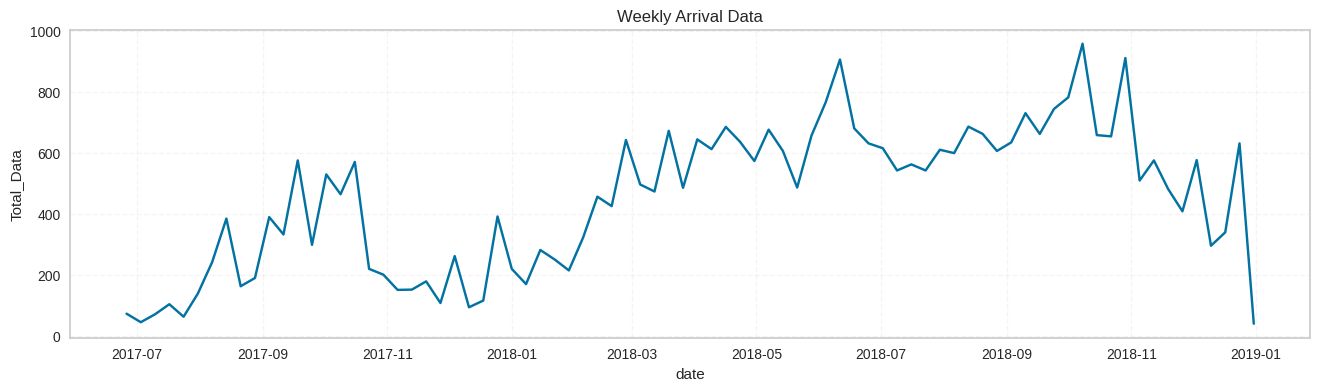

In [ ]:
# Plot
weekly_data['date'] = weekly_data['date'].dt.to_timestamp()
weekly_data.set_index('date', inplace=True)

plt.figure(figsize=(16, 4))
sns.lineplot(data=weekly_data, x=weekly_data.index, y=weekly_data.Total_Data)
plt.title("Weekly Arrival Data")
plt.grid(True, linestyle='--', alpha=0.2)
plt.show()

#### Monthly Arrival

In [ ]:
monthly_data = data.groupby(data['date'].dt.to_period('M')).size().reset_index(name='Total_Data')
monthly_data.head()

date  Total_Data
0  2017-07         363
1  2017-08        1014
2  2017-09        1649
3  2017-10        1913
4  2017-11         647

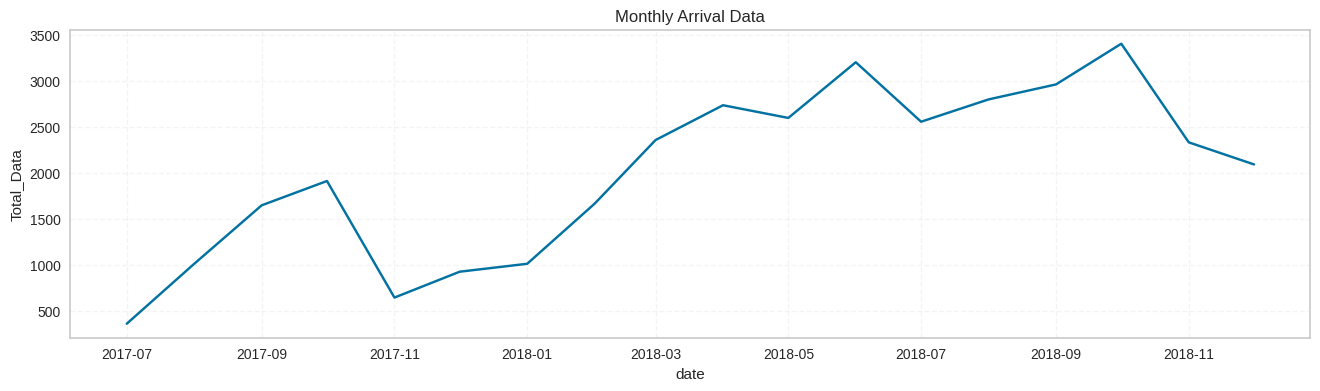

In [ ]:
# Plot
monthly_data['date'] = monthly_data['date'].dt.to_timestamp()
monthly_data.set_index('date', inplace=True)

plt.figure(figsize=(16, 4))
sns.lineplot(data=monthly_data, x=monthly_data.index, y=monthly_data.Total_Data)
plt.title("Monthly Arrival Data")
plt.grid(True, linestyle='--', alpha=0.2)
plt.show()

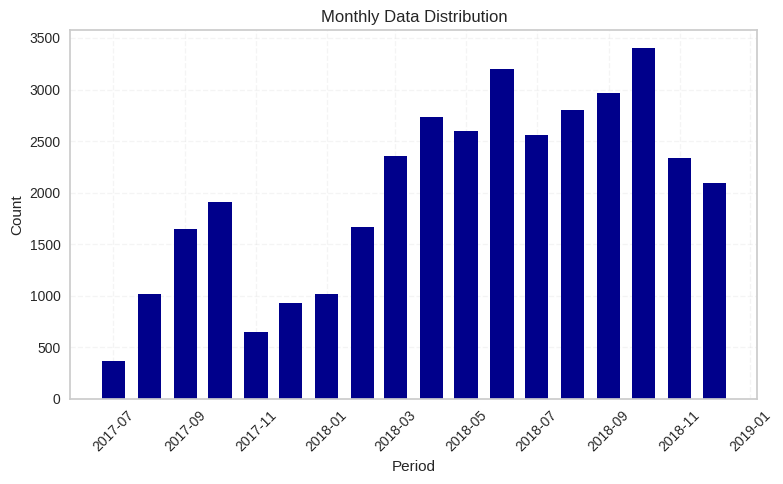

In [ ]:
# Plot
plt.figure(figsize=(8, 5))
plt.bar(monthly_data.index, monthly_data['Total_Data'], width=20, align='center', color='darkblue')
plt.xlabel('Period')
plt.ylabel('Count')
plt.title('Monthly Data Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.2)
plt.show()

## Bivariate Analysis

### Adults vs Children Guests

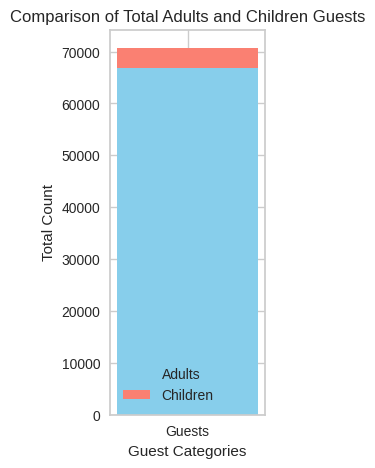

In [ ]:
# Plot
total_adults = data['no_of_adults'].sum()
total_children = data['no_of_children'].sum()

# Creating a stacked bar plot to visualize the comparison
categories = ['Guests']
values = [[total_adults, total_children]]

plt.figure(figsize=(2, 5))
plt.bar(categories, total_adults, color='skyblue', label='Adults')
plt.bar(categories, total_children, bottom=total_adults, color='salmon', label='Children')

plt.xlabel('Guest Categories')
plt.ylabel('Total Count')
plt.title('Comparison of Total Adults and Children Guests')
plt.legend()
plt.show()

##### Adults and Children Arrival by Day

In [ ]:
# Counts
data['date'] = pd.to_datetime(data['date'])
data['day_of_week'] = data['date'].dt.day_name()

day_totals = data.groupby('day_of_week')[['no_of_adults', 'no_of_children']].sum()

day_totals['Count'] = data.groupby('day_of_week').size()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_totals = day_totals.reindex(day_order)

day_totals

no_of_adults  no_of_children  Count
day_of_week                                     
Monday              10137             637   5380
Tuesday              9303             537   4899
Wednesday            9301             524   5120
Thursday             7979             431   4544
Friday               8471             472   4741
Saturday            10078             512   5419
Sunday              11601             700   6135

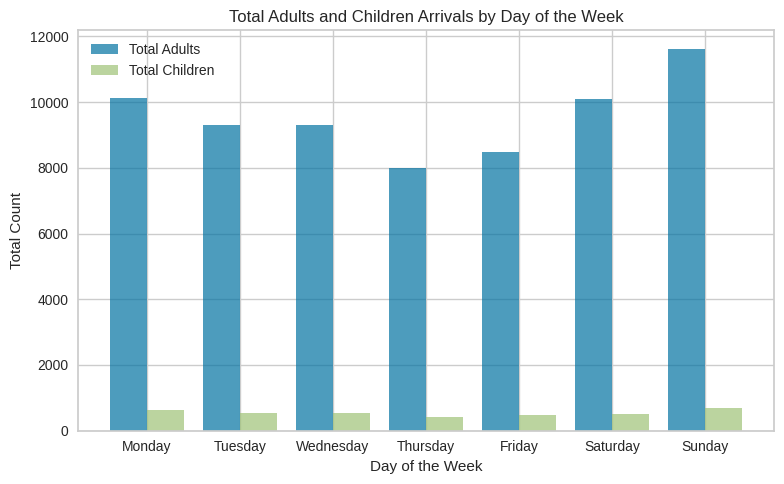

In [ ]:
# Plot
plt.figure(figsize=(8, 5))

plt.bar(day_totals.index, day_totals['no_of_adults'], label='Total Adults', alpha=0.7, width=0.4)

plt.bar([i + 0.4 for i in range(len(day_totals))], day_totals['no_of_children'], label='Total Children', alpha=0.7, width=0.4)

plt.xlabel('Day of the Week')
plt.ylabel('Total Count')
plt.title('Total Adults and Children Arrivals by Day of the Week')
plt.legend()
plt.xticks([i + 0.2 for i in range(len(day_totals))], day_totals.index)
plt.tight_layout()

plt.show()

### Average Price vs Everybody

In [ ]:
# Create the function
def plot_average_by_category(data, column_name, category_column, color='skyblue'):

    avg_column_by_category = data.groupby(category_column)[column_name].mean()

    plt.figure(figsize=(8, 5))
    avg_column_by_category.plot(kind='bar', color=color)

    plt.xlabel(category_column.capitalize())
    plt.ylabel(f'Average {column_name}')
    plt.title(f'Average {column_name} by {category_column.capitalize()}')
    plt.xticks(rotation=0)
    plt.tight_layout()

    plt.show()

data['month'] = data['date'].dt.month
data['month'] = data['month'].astype(int)

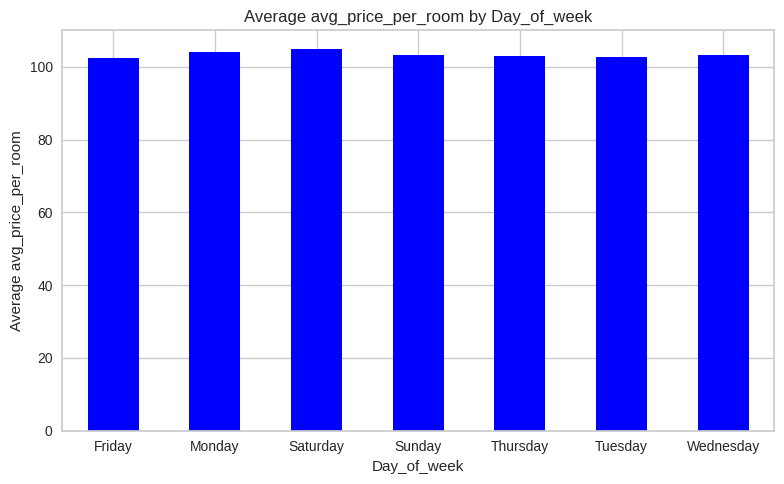

In [ ]:
plot_average_by_category(data, 'avg_price_per_room', 'day_of_week', color = 'blue')

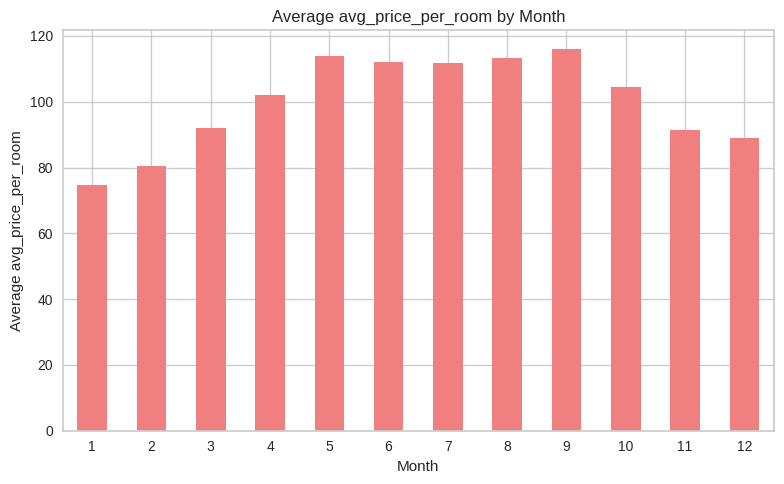

In [ ]:
plot_average_by_category(data, 'avg_price_per_room', 'month', color = 'lightcoral')

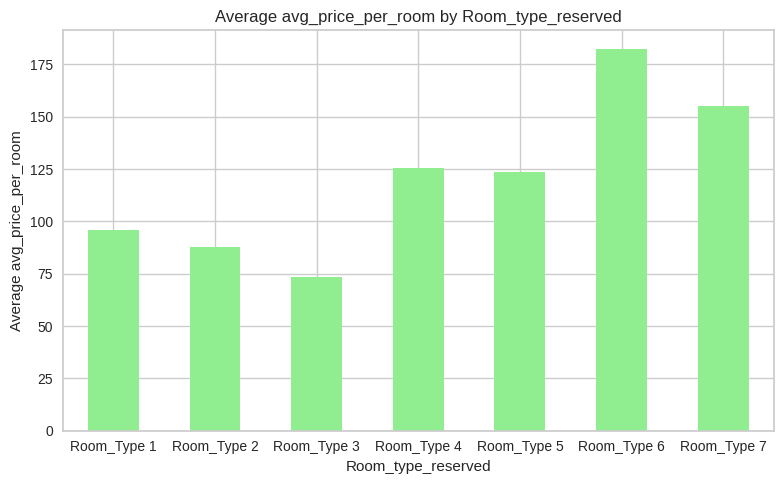

In [ ]:
plot_average_by_category(data, 'avg_price_per_room', 'room_type_reserved', color = 'lightgreen')

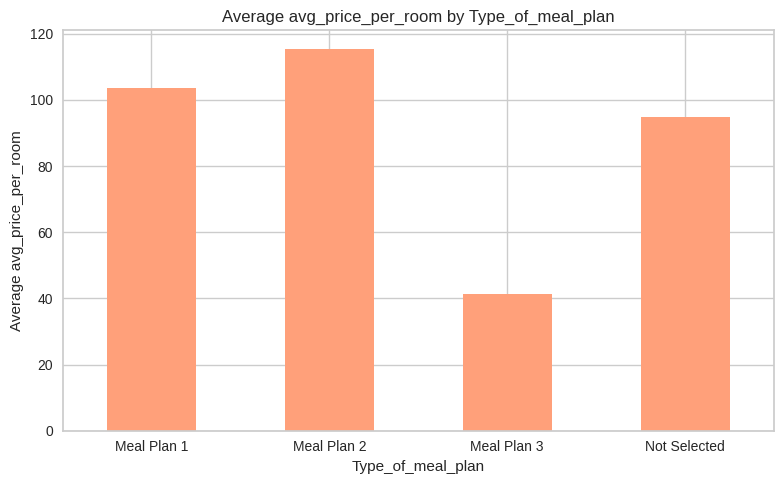

In [ ]:
plot_average_by_category(data, 'avg_price_per_room', 'type_of_meal_plan', color = 'lightsalmon')

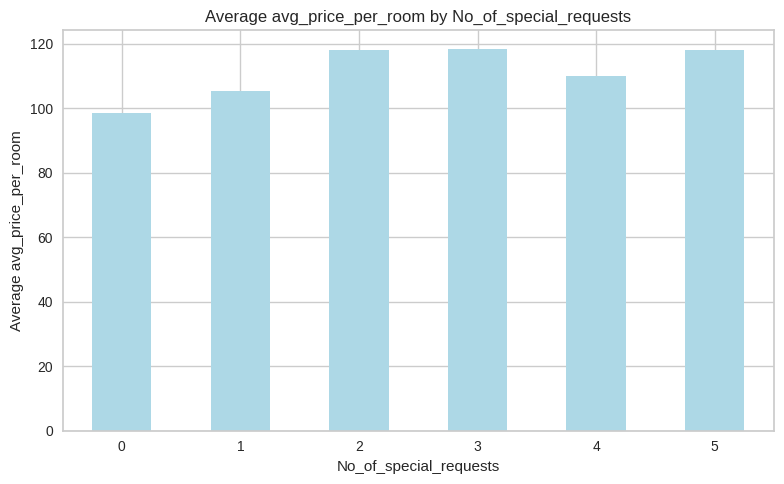

In [ ]:
plot_average_by_category(data, 'avg_price_per_room', 'no_of_special_requests', color = 'lightblue')

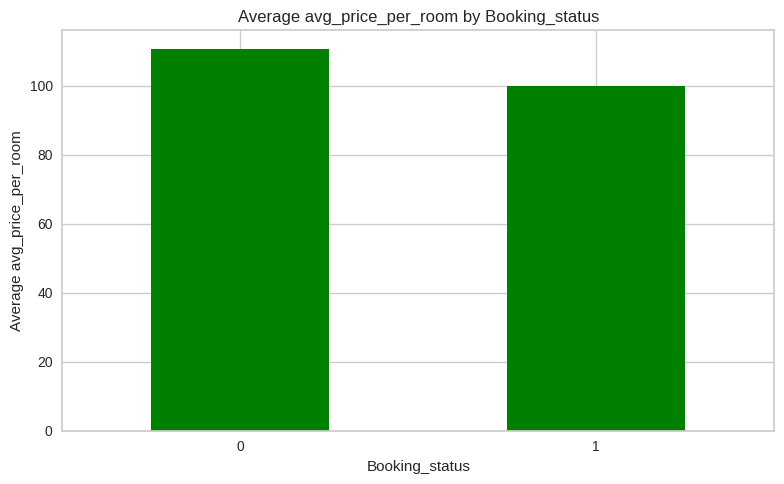

In [ ]:
plot_average_by_category(data, 'avg_price_per_room', 'booking_status', color = 'green')

### Lead Time vs Monthly Arrival

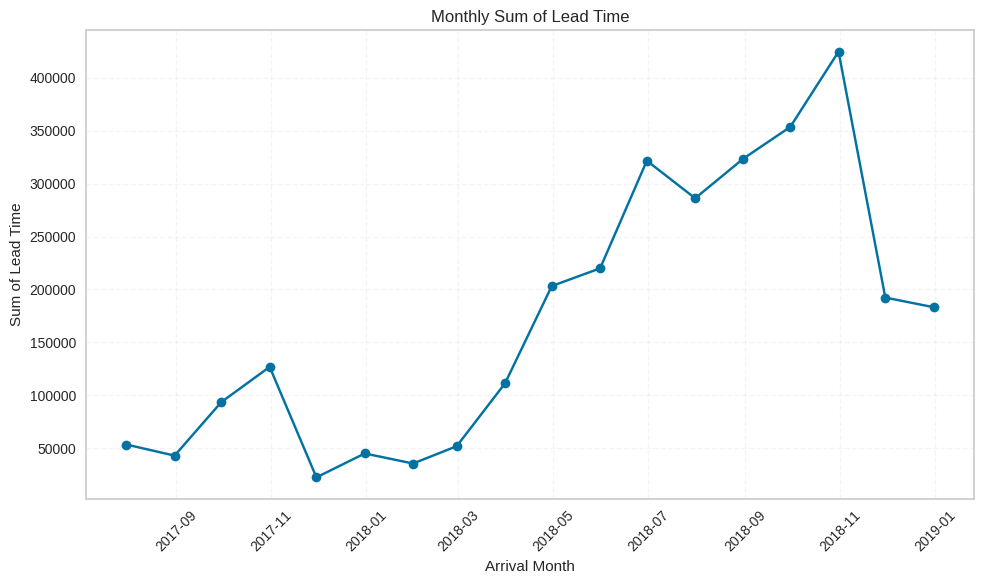

In [ ]:
# Plot
monthly_lead_time = data.resample('M', on='date')['lead_time'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_lead_time.index, monthly_lead_time, marker='o', linestyle='-')
plt.title('Monthly Sum of Lead Time')
plt.xlabel('Arrival Month')
plt.ylabel('Sum of Lead Time')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()

### Room Type vs Booking Status vs Monthly Arrival

In [ ]:
# Grouping
room_type_status = data.pivot_table(data, index=['month', 'room_type_reserved'], columns='booking_status', aggfunc='size', fill_value=0)
room_type_status.columns = ['Canceled', 'Not_Canceled']
room_type_status.reset_index(inplace=True)

In [ ]:
room_type_status

month room_type_reserved  Canceled  Not_Canceled
0       1        Room_Type 1        17           847
1       1        Room_Type 2         5            45
2       1        Room_Type 4         2            80
3       1        Room_Type 5         0             3
4       1        Room_Type 6         0            12
..    ...                ...       ...           ...
71     12        Room_Type 3         0             2
72     12        Room_Type 4        77           396
73     12        Room_Type 5         0            19
74     12        Room_Type 6        21            81
75     12        Room_Type 7         1            18

[76 rows x 4 columns]

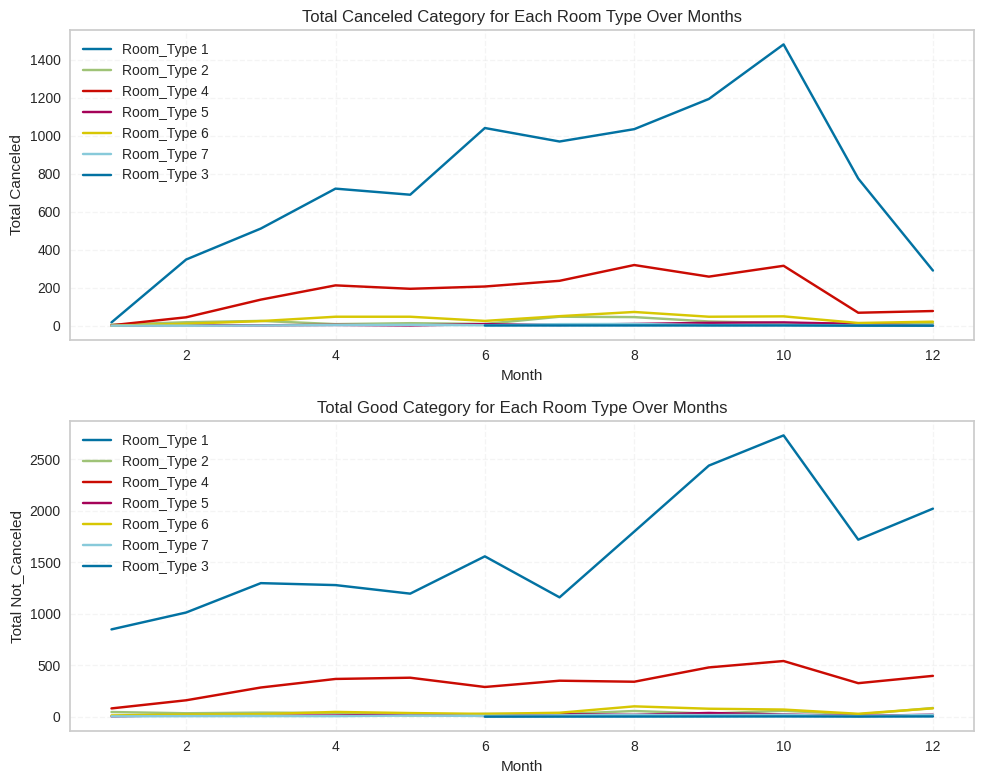

In [ ]:
# Group and Count
monthly_totals = room_type_status.groupby(['month', 'room_type_reserved'])[['Canceled', 'Not_Canceled']].sum().reset_index()
monthly_counts = room_type_status.groupby(['month', 'room_type_reserved'])['Not_Canceled'].count().reset_index()

# Plot
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
for room_type in monthly_totals['room_type_reserved'].unique():
    room_type_data = monthly_totals[monthly_totals['room_type_reserved'] == room_type]
    plt.plot(room_type_data['month'], room_type_data['Canceled'], label=room_type)
plt.title('Total Canceled Category for Each Room Type Over Months')
plt.xlabel('Month')
plt.ylabel('Total Canceled')
plt.grid(True, linestyle='--', alpha=0.2)
plt.legend()

plt.subplot(2, 1, 2)
for room_type in monthly_totals['room_type_reserved'].unique():
    room_type_data = monthly_totals[monthly_totals['room_type_reserved'] == room_type]
    plt.plot(room_type_data['month'], room_type_data['Not_Canceled'], label=room_type)
plt.title('Total Good Category for Each Room Type Over Months')
plt.xlabel('Month')
plt.ylabel('Total Not_Canceled')
plt.grid(True, linestyle='--', alpha=0.2)
plt.legend()

plt.tight_layout()
plt.show()

### Booking Status vs Everybody

In [ ]:
# Create functions for the visualization
def plot_stack1(data, colors, x_label=' ', y_label=' ', title=' '):
    percentage_data = (data.T * 100.0 / data.T.sum()).T
    ax = percentage_data.plot(kind='bar', width=0.3, stacked=True, rot=0, figsize=(10, 5), color=colors)

    plt.ylabel(f'{y_label}\n', horizontalalignment="center", fontstyle="normal", fontfamily="sans-serif")
    plt.xlabel(f'{x_label}\n', horizontalalignment="center", fontstyle="normal", fontfamily="sans-serif")
    plt.title(f'{title}\n', horizontalalignment="center", fontstyle="normal", fontfamily="sans-serif")
    plt.legend(loc='upper right')
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.yticks(rotation=0, horizontalalignment="right")
    plt.grid(True, linestyle='--', alpha=0.2)

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        percentage = height
        if percentage != 0:
            label_text = '{:.1f}%'.format(percentage)
            if percentage == 100:
                label_text = '100%'
            ax.text(x + width / 2,
                    y + height / 2,
                    label_text,
                    horizontalalignment='center',
                    verticalalignment='center')

    ax.autoscale(enable=False, axis='both', tight=False)
    plt.show()

def plot_stack2(data, x_label=' ', y_label=' ', title=' ', colors=None):
    ax = data.plot(kind='bar', width=0.3, stacked=True, rot=0, figsize=(10, 5), color=colors)

    plt.ylabel(f'{y_label}\n', horizontalalignment="center", fontstyle="normal", fontfamily="sans-serif")
    plt.xlabel(f'{x_label}\n', horizontalalignment="center", fontstyle="normal", fontfamily="sans-serif")
    plt.title(f'{title}\n', horizontalalignment="center", fontstyle="normal", fontfamily="sans-serif")
    plt.legend(loc='upper right')
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.yticks(rotation=0, horizontalalignment="right")
    plt.grid(True, linestyle='--', alpha=0.2)

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        label_text = f'{height:.2f}'
        ax.text(x + width / 2,
                y + height / 2,
                label_text,
                horizontalalignment='center',
                verticalalignment='center')

    ax.autoscale(enable=False, axis='both', tight=False)
    plt.show()

#### Booking Status vs Meal Plan

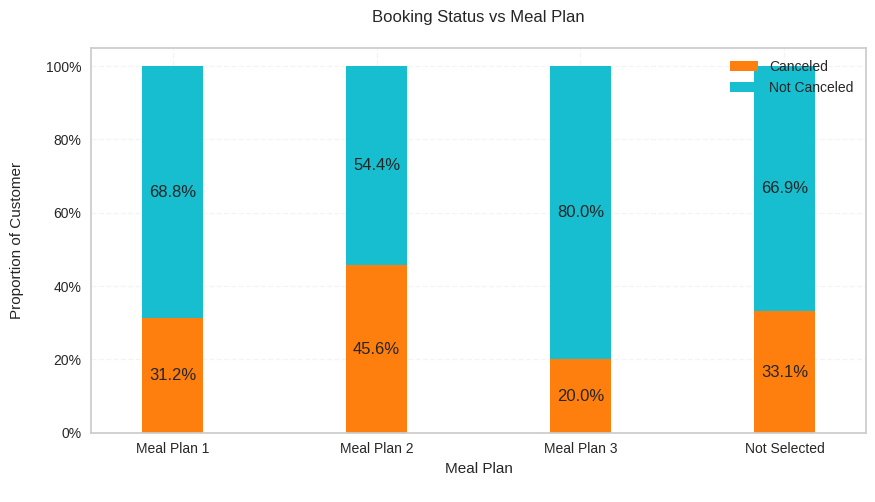

In [ ]:
meal_booking_status = data.groupby(['type_of_meal_plan','booking_status']).size().unstack()
meal_booking_status.rename(columns={0:'Canceled', 1:'Not Canceled'}, inplace=True)
colors  = ['#ff7f0e','#17becf']
plot_stack1(meal_booking_status, colors, y_label='Proportion of Customer', x_label='Meal Plan', title='Booking Status vs Meal Plan')

#### Booking Status vs Room Type

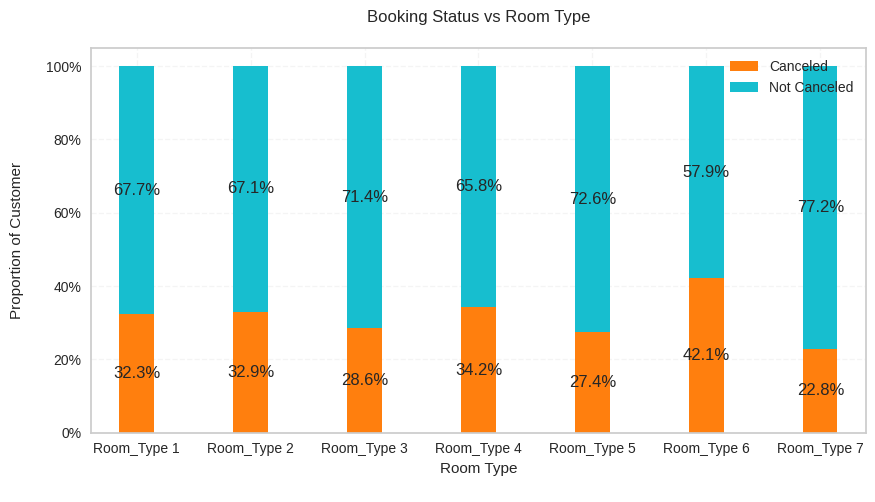

In [ ]:
room_booking_status = data.groupby(['room_type_reserved','booking_status']).size().unstack()
room_booking_status.rename(columns={0:'Canceled', 1:'Not Canceled'}, inplace=True)
colors  = ['#ff7f0e','#17becf']
plot_stack1(room_booking_status, colors, y_label='Proportion of Customer', x_label='Room Type', title='Booking Status vs Room Type')

#### Booking Status vs Market Segment

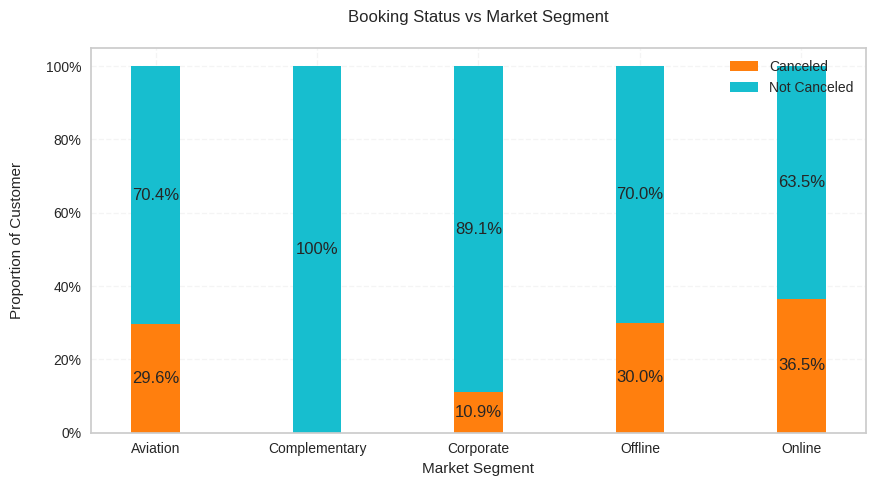

In [ ]:
segment_booking_status = data.groupby(['market_segment_type','booking_status']).size().unstack()
segment_booking_status.rename(columns={0:'Canceled', 1:'Not Canceled'}, inplace=True)
colors  = ['#ff7f0e','#17becf']
plot_stack1(segment_booking_status, colors, y_label='Proportion of Customer', x_label='Market Segment', title='Booking Status vs Market Segment')

#### Booking Status vs No of Special Requests

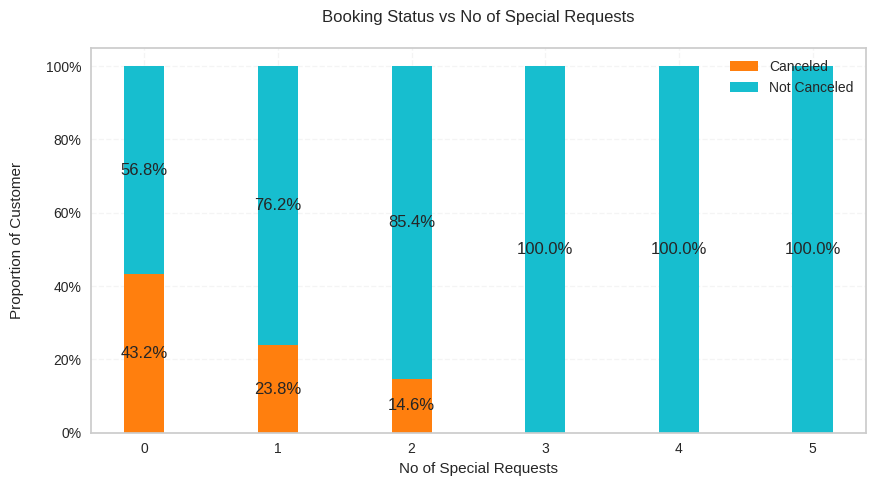

In [ ]:
request_booking_status = data.groupby(['no_of_special_requests','booking_status']).size().unstack()
request_booking_status.rename(columns={0:'Canceled', 1:'Not Canceled'}, inplace=True)
colors  = ['#ff7f0e','#17becf']
plot_stack1(request_booking_status, colors, y_label='Proportion of Customer', x_label='No of Special Requests', title='Booking Status vs No of Special Requests')

#### Booking Status vs Days

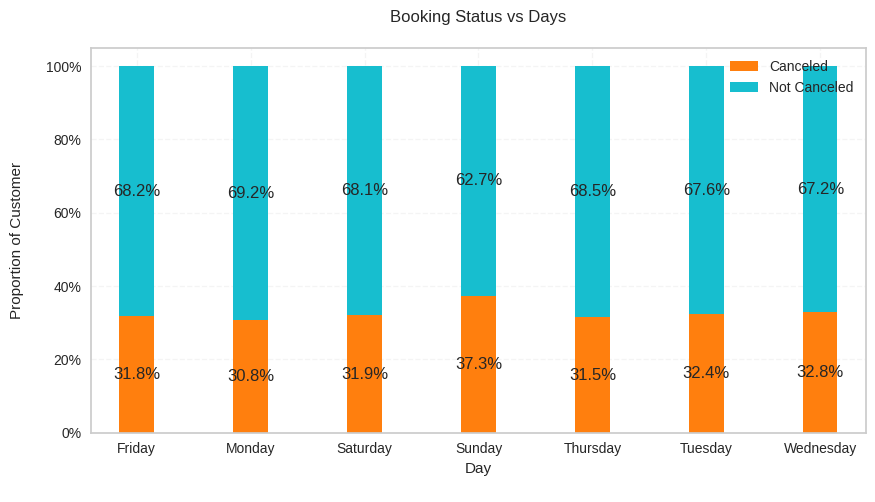

In [ ]:
day_booking_status = data.groupby(['day_of_week','booking_status']).size().unstack()
day_booking_status.rename(columns={0:'Canceled', 1:'Not Canceled'}, inplace=True)
colors  = ['#ff7f0e','#17becf']
plot_stack1(day_booking_status, colors, y_label='Proportion of Customer', x_label='Day', title='Booking Status vs Days')

# Outlier Check

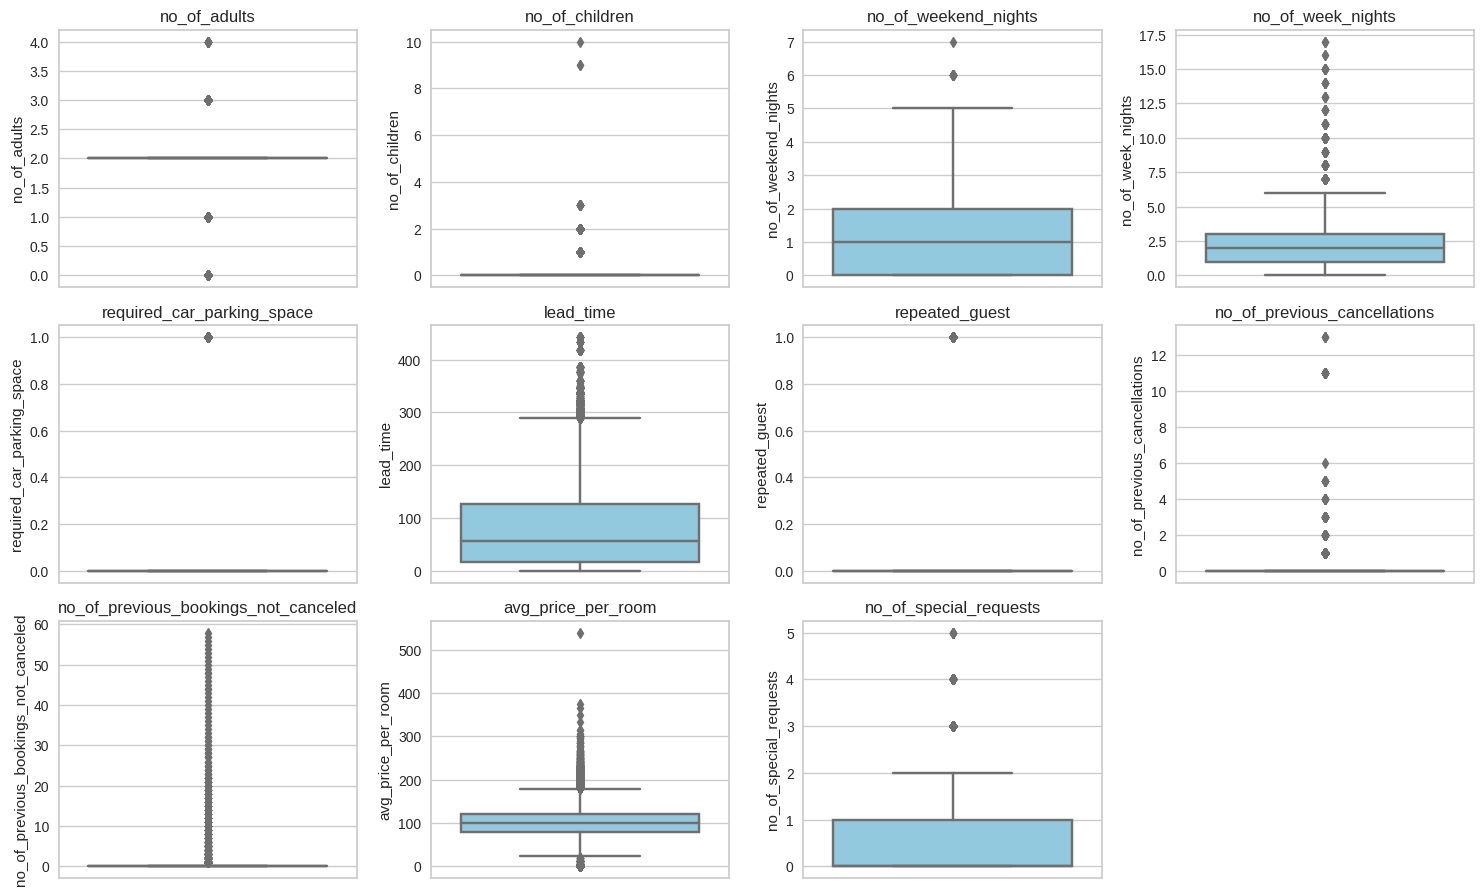

In [ ]:
# Plot the outlier
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
numeric_columns.remove("month")
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=data[variable], whis=1.5, color='skyblue')
    plt.title(variable)
    plt.tight_layout()

plt.show()

# Forecasting Future Booking

## Data Preperation

In [ ]:
# We predict the future booking order
total_booking = data.groupby('date').size().reset_index(name='total_booking_count')
total_booking.set_index('date', inplace=True)
total_booking

total_booking_count
date                           
2017-07-01                   68
2017-07-02                    5
2017-07-03                    3
2017-07-04                    4
2017-07-05                    3
...                         ...
2018-12-27                  147
2018-12-28                   84
2018-12-29                  105
2018-12-30                   93
2018-12-31                   40

[549 rows x 1 columns]

## Original Data Plot

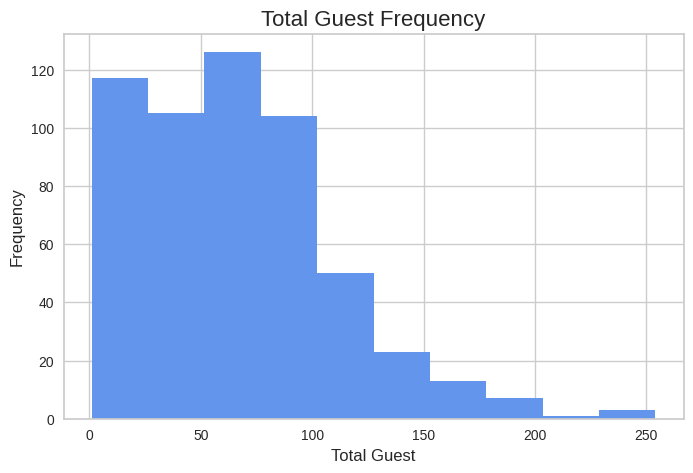

In [ ]:
# Total Guest Frequency
plt.figure(figsize = (8,5))
plt.hist(total_booking['total_booking_count'], color = 'cornflowerblue')
plt.xlabel('Total Guest', size = 12)
plt.ylabel('Frequency', size = 12)
plt.title('Total Guest Frequency', size = 16)
plt.show()

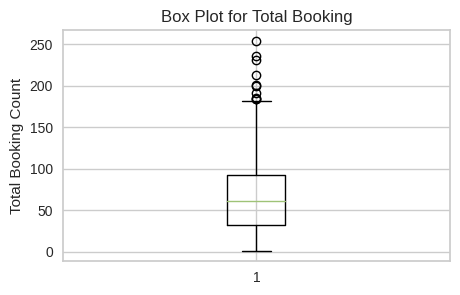

In [ ]:
# Find the outlier
plt.figure(figsize=(5, 3))
plt.boxplot(total_booking)
plt.title('Box Plot for Total Booking')
plt.ylabel('Total Booking Count')
plt.show()

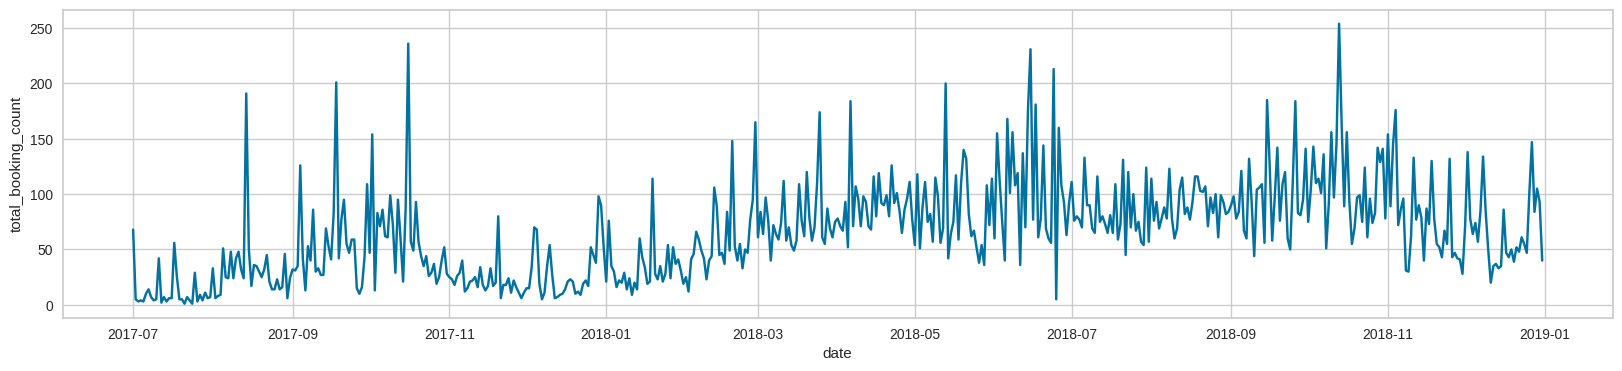

In [ ]:
# Plot
plt.figure(figsize=(20, 4))
sns.lineplot(data=total_booking, x=total_booking.index,y=total_booking.total_booking_count)
plt.show()

## Decomposition

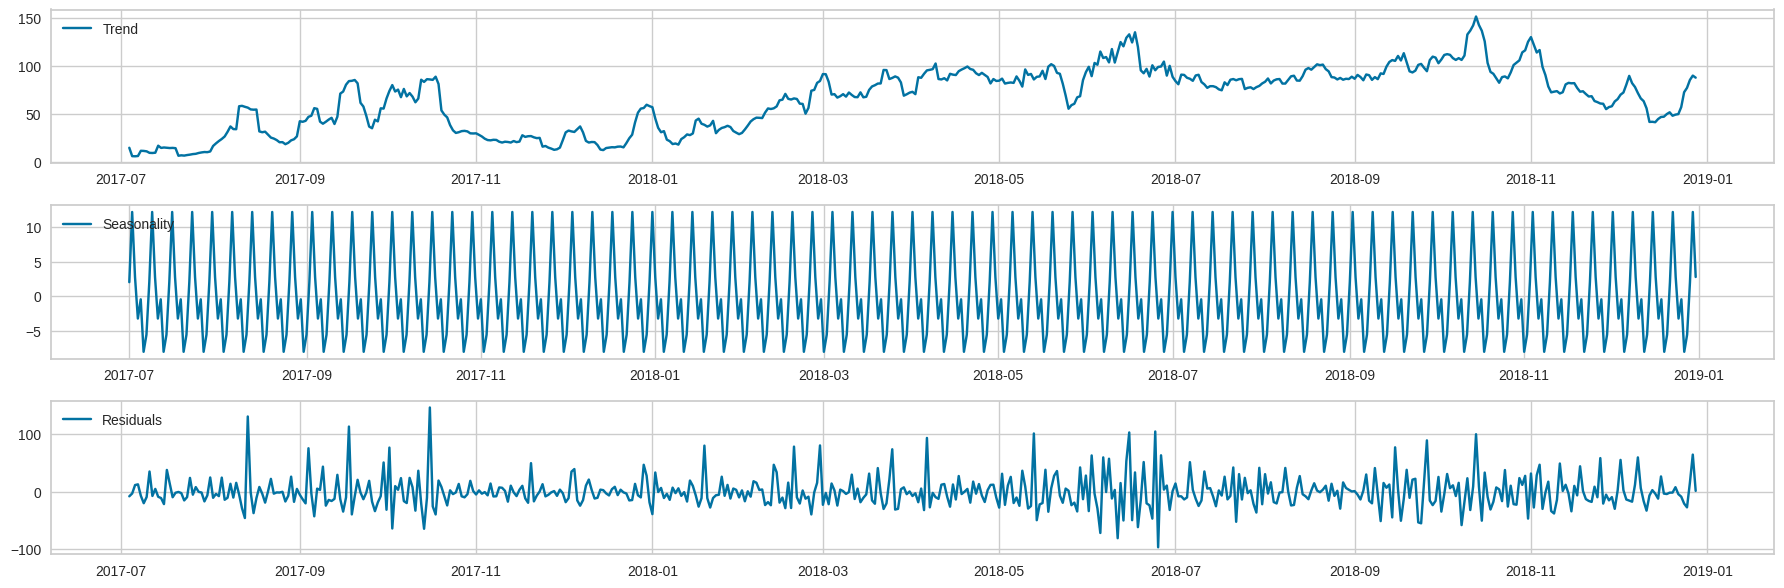

In [ ]:
decomposition = sm.tsa.seasonal_decompose(total_booking['total_booking_count'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(18, 8))
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Define the window
total_booking['rollMean'] = total_booking.total_booking_count.rolling(window=7).mean()
total_booking['rollStd'] = total_booking.total_booking_count.rolling(window=7).std()

<Axes: xlabel='date', ylabel='total_booking_count'>

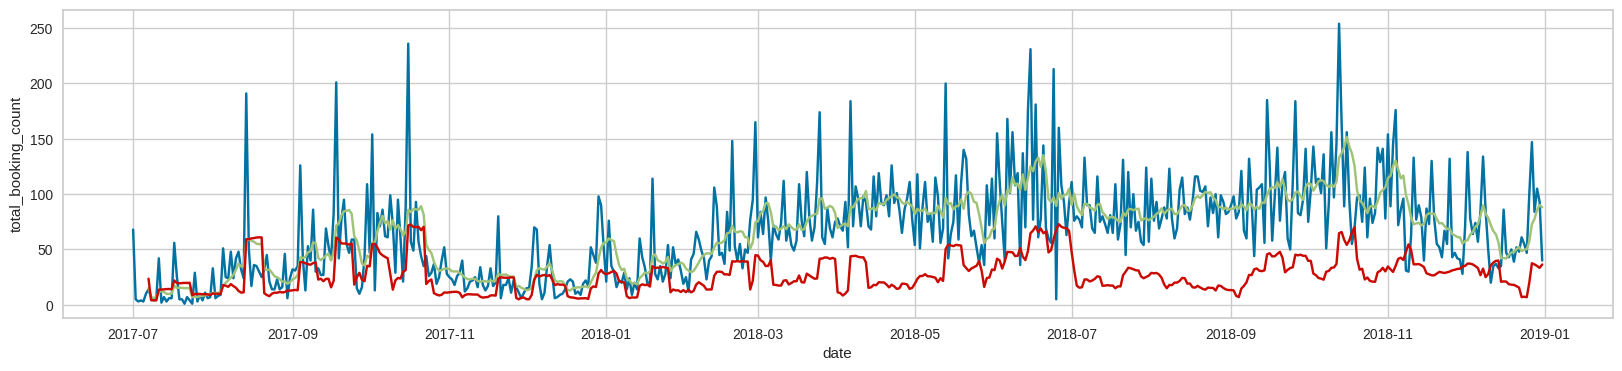

In [ ]:
# Plot the rollMean and rollStd
plt.figure(figsize = (20,4))
sns.lineplot(data=total_booking, x=total_booking.index, y=total_booking.total_booking_count)
sns.lineplot(data=total_booking, x=total_booking.index, y=total_booking.rollMean)
sns.lineplot(data=total_booking, x=total_booking.index, y=total_booking.rollStd)

## Stationarity Test with Dickey-Fuller Test

In [ ]:
adfTest = adfuller(total_booking['total_booking_count'],autolag = "AIC",) # Use AIC for choosing the number of lags
adfTest

(-2.3093221450209978,
 0.16897901923855413,
 13,
 535,
 {'1%': -3.4426321555520905,
  '5%': -2.86695748394138,
  '10%': -2.5696553279762426},
 5209.569431169067)

In [ ]:
stats_adf_test = pd.Series(adfTest[0:4],index=['Test Statistic', 'p-value','#lags used','number of observations used'])
stats_adf_test

Test Statistic                  -2.309322
p-value                          0.168979
#lags used                      13.000000
number of observations used    535.000000
dtype: float64

The p-value is 0.168979. Thus, this data is not stationary

## Dickey-Fuller Test (Time Shift Differencing and Log)

In [ ]:
# Build the function
def test_stationarity(total_booking, total_booking_count):
    total_booking = total_booking.copy()
    total_booking.loc[:, 'rollMean'] = total_booking[total_booking_count].rolling(window=7).mean()
    total_booking.loc[:, 'rollStd'] = total_booking[total_booking_count].rolling(window=7).std()

    adfTest = adfuller(total_booking[total_booking_count], autolag='AIC')
    stats = pd.Series(adfTest[0:4], index=['Test Statistic', 'p-value', '#lags used', 'number of observationis used'])
    print(stats)

    for key, values in adfTest[4].items():
        print('criticality', key, ':', values)

    sns.lineplot(data=total_booking, x=total_booking.index, y=total_booking_count)
    sns.lineplot(data=total_booking, x=total_booking.index, y='rollMean')
    sns.lineplot(data=total_booking, x=total_booking.index, y='rollStd')

### Time Shift Differencing

In [ ]:
total_booking['Shift'] = total_booking.total_booking_count.shift()
total_booking['shiftDiff'] = total_booking['total_booking_count'] - total_booking['Shift']
total_booking.head()

total_booking_count  rollMean  rollStd  Shift  shiftDiff
date                                                                
2017-07-01                   68       NaN      NaN    NaN        NaN
2017-07-02                    5       NaN      NaN   68.0      -63.0
2017-07-03                    3       NaN      NaN    5.0       -2.0
2017-07-04                    4       NaN      NaN    3.0        1.0
2017-07-05                    3       NaN      NaN    4.0       -1.0

Test Statistic                 -1.165370e+01
p-value                         2.008841e-21
#lags used                      1.200000e+01
number of observationis used    5.300000e+02
dtype: float64
criticality 1% : -3.4427485933555886
criticality 5% : -2.8670087381529723
criticality 10% : -2.569682641509434


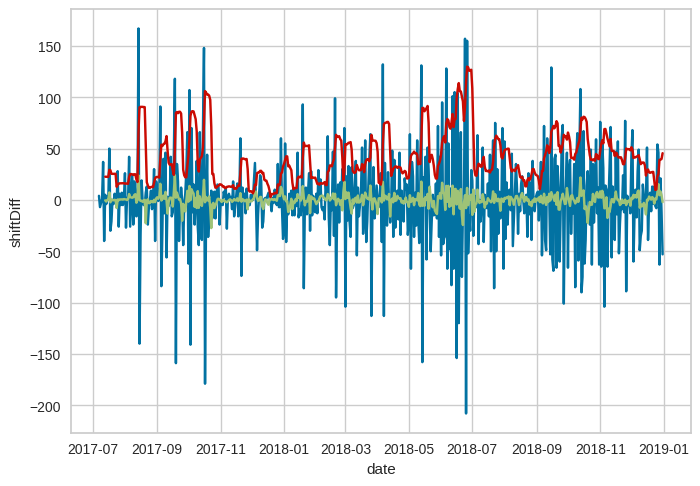

In [ ]:
test_stationarity(total_booking.dropna(),'shiftDiff')

### Log

In [ ]:
log_df = total_booking[['total_booking_count']].copy()
log_df['log'] = np.log(log_df['total_booking_count'])
log_df

total_booking_count       log
date                                     
2017-07-01                   68  4.219508
2017-07-02                    5  1.609438
2017-07-03                    3  1.098612
2017-07-04                    4  1.386294
2017-07-05                    3  1.098612
...                         ...       ...
2018-12-27                  147  4.990433
2018-12-28                   84  4.430817
2018-12-29                  105  4.653960
2018-12-30                   93  4.532599
2018-12-31                   40  3.688879

[549 rows x 2 columns]

Test Statistic                   -3.077572
p-value                           0.028258
#lags used                       13.000000
number of observationis used    535.000000
dtype: float64
criticality 1% : -3.4426321555520905
criticality 5% : -2.86695748394138
criticality 10% : -2.5696553279762426


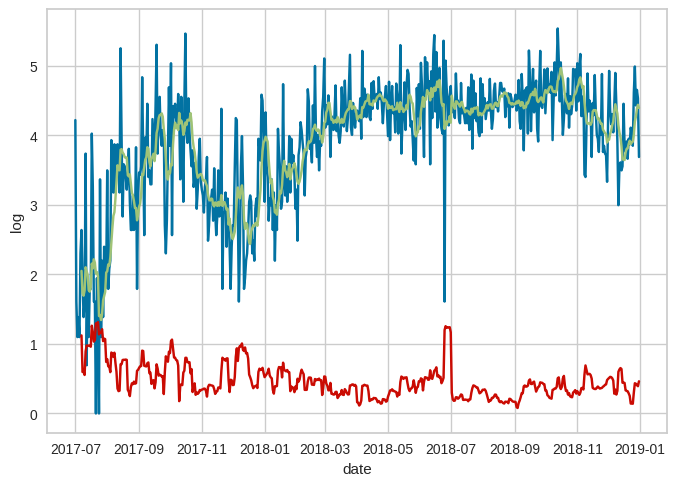

In [ ]:
test_stationarity(log_df,'log')

The p-value is 0.02, we can use this data to predict

## Determining the(p, d, q) Parameter's Order

p = Autoregressive Order (based on PACF)

d = Differencing order

q = Moving Average Order (based on ACF)

## Autocorrelation Function and Partial Autocorrelation Function

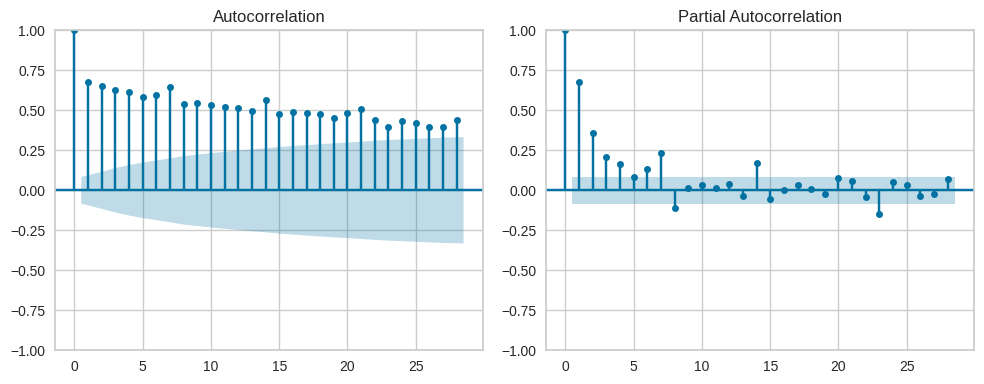

In [ ]:
# Plot the Autocorrelation Function (ACF)
plt.figure(figsize=(10, 4))
ax1 = plt.subplot(121)
plot_acf(log_df['log'], ax=ax1)

# Plot the Partial Autocorrelation Function (PACF)
ax2 = plt.subplot(122)
plot_pacf(log_df['log'], ax=ax2)

plt.tight_layout()
plt.show()

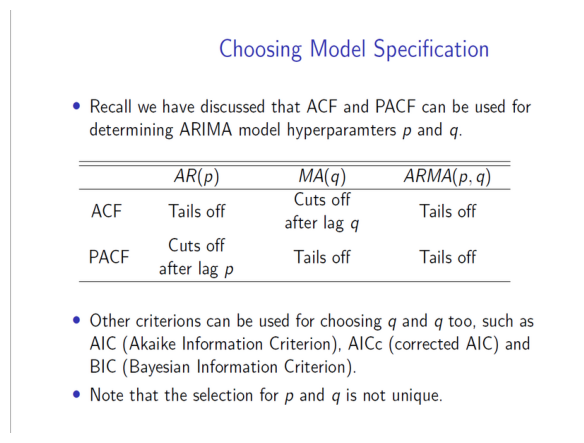

In [ ]:
image_url = "https://drive.google.com/uc?export=download&id=1rCIpCv3MwjAcKNPv7PrfB-NCLn9UcmI4"
response = requests.get(image_url)
img = Image.open(BytesIO(response.content))
width, height = 800, 600
img = img.resize((width, height), Image.LANCZOS)
plt.imshow(img)
plt.axis('off')
plt.show()

ACF = Tails off

PACF = Cut off (It should be 9)

### Manual Test

Since the selection for p and q is not unique. Try to test which AIC and BIC scores are lower and higher for the Likelihood score

For integrated (d) value, use 1 due to transforming the original data set once (log)

In [ ]:
log_df.index = pd.to_datetime(log_df.index)
log_df = log_df.asfreq('D')
ar_model = SARIMAX(log_df['log'], order=(0,1,9)).fit()
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    log   No. Observations:                  549
Model:               SARIMAX(0, 1, 9)   Log Likelihood                -463.474
Date:                Wed, 03 Jan 2024   AIC                            946.949
Time:                        06:11:51   BIC                            990.012
Sample:                    07-01-2017   HQIC                           963.780
                         - 12-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7560      0.032    -23.375      0.000      -0.819      -0.693
ma.L2         -0.0295      0.047     -0.633      0.527      -0.121       0.062
ma.L3         -0.0470      0.051     -0.930      0.353      -0.146       0.052
ma.L4          0.0298      0.053      0.557      0.578      -0.075       0.134
ma.L5         -0.0911      0.050     -1.824      0.068      -0.189       0.007
ma.L6          0.1162      0.046      2.551      0.011       0.027       0.206
ma.L7          0.1180      0.052      2.264      0.024       0.016       0.220
ma.L8         -0.2305      0.048     -4.814      0.000      -0.324      -0.137
ma.L9          0.0429      0.042      1.033      0.302      -0.038       0.124
sigma2         0.3170      0.013     24.033      0.000       0.291       0.343
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):               188.65
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.23   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
print(log_df.shape)
train = log_df['log'].iloc[:-14]
test = log_df['log'].iloc[-14:]
print(train.shape, test.shape)

(549, 2)
(535,) (14,)


In [ ]:
print(test.index, train.index)

DatetimeIndex(['2018-12-18', '2018-12-19', '2018-12-20', '2018-12-21',
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='date', freq='D') DatetimeIndex(['2017-07-01', '2017-07-02', '2017-07-03', '2017-07-04',
               '2017-07-05', '2017-07-06', '2017-07-07', '2017-07-08',
               '2017-07-09', '2017-07-10',
               ...
               '2018-12-08', '2018-12-09', '2018-12-10', '2018-12-11',
               '2018-12-12', '2018-12-13', '2018-12-14', '2018-12-15',
               '2018-12-16', '2018-12-17'],
              dtype='datetime64[ns]', name='date', length=535, freq='D')


In [ ]:
test_df = test.to_frame()
train_df = train.to_frame()

In [ ]:
# ARIMA
order = (0, 1, 9)  # Order (p, d, q)
model = sm.tsa.ARIMA(train, order=order)
results = model.fit()

# Calculate the length of train and test data
start = len(train)
end = len(train) + len(test) - 1

pred_arima = results.predict(start=start, end=end, typ='levels')

# Convert predictions into appropriate indices
pred_arima.index = log_df.index[start:end + 1]
# print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
# SARIMAX
order = (0, 1, 9)
seasonal_order = (0, 1, 9, 12)  # Seasonal order (P, D, Q, m)
model = sm.tsa.SARIMAX(train, order=order, seasonal_order=seasonal_order)
sarimax_results = model.fit()

start = len(train)
end = len(train) + len(test) - 1

pred_sarimax = sarimax_results.predict(start=start, end=end, typ='levels')

# Convert predictions into appropriate indices
pred_sarimax.index = log_df.index[start:end + 1]
# print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


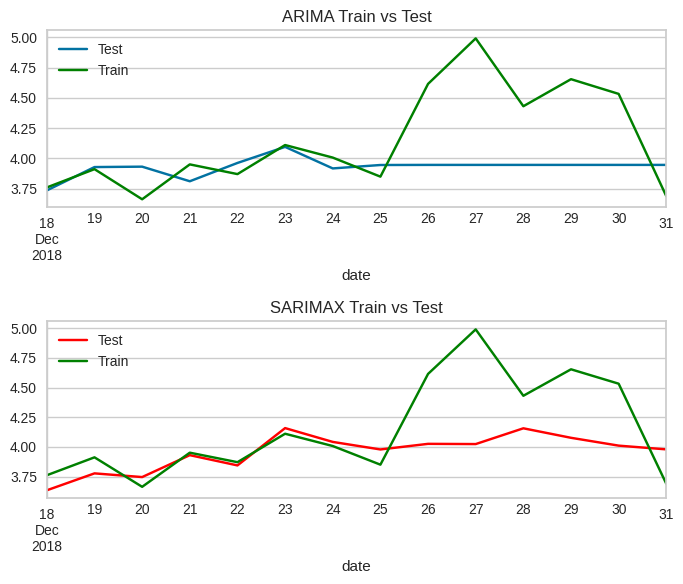

In [ ]:
# Visualize ARIMA train and test
plt.figure(figsize=(7, 6))
plt.subplot(2, 1, 1)
pred_arima.plot(legend=True, label='Test')
test_df['log'].plot(legend=True, label='Train', color='green')
plt.title('ARIMA Train vs Test')

# Visualize SARIMAX train and test
plt.subplot(2, 1, 2)
pred_sarimax.plot(legend=True, label='Test', color='red')
test_df['log'].plot(legend=True, label='Train', color='green')
plt.title('SARIMAX Train vs Test')

plt.tight_layout()
plt.show()

In [ ]:
# Check which model is better
rmse = sqrt(mean_squared_error(test_df['log'], pred_arima))
print(f'RMSE for ARIMA: {rmse}')

rmse = sqrt(mean_squared_error(test_df['log'], pred_sarimax))
print(f'RMSE for SARIMAX: {rmse}')

RMSE for ARIMA: 0.4469608897860621
RMSE for SARIMAX: 0.38813838309811144


In [ ]:
train_log = log_df['log']
train_log

date
2017-07-01    4.219508
2017-07-02    1.609438
2017-07-03    1.098612
2017-07-04    1.386294
2017-07-05    1.098612
                ...   
2018-12-27    4.990433
2018-12-28    4.430817
2018-12-29    4.653960
2018-12-30    4.532599
2018-12-31    3.688879
Freq: D, Name: log, Length: 549, dtype: float64

## ARIMA Forecasting

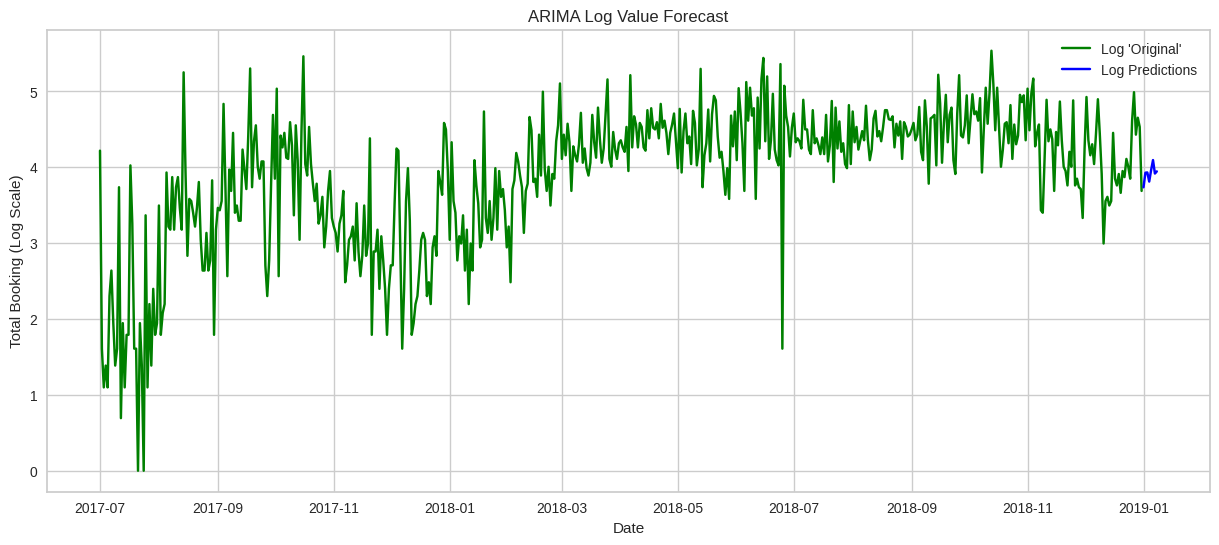

In [ ]:
# We want to see 8 days ahead
forecast_log_arima = results.forecast(steps=8)

# Extend the time index for predictions
future_index = pd.date_range(start=log_df.index[-1], periods=9, freq='D')

# Visualize the original time series (log) and the predictions
plt.figure(figsize=(15, 6))
plt.plot(log_df.index, log_df['log'], label="Log 'Original'", color='green')
plt.plot(future_index[1:], forecast_log_arima, color='blue', label='Log Predictions')
plt.xlabel('Date')
plt.ylabel('Total Booking (Log Scale)')
plt.title('ARIMA Log Value Forecast')
plt.legend()
plt.show()

## SARIMAX

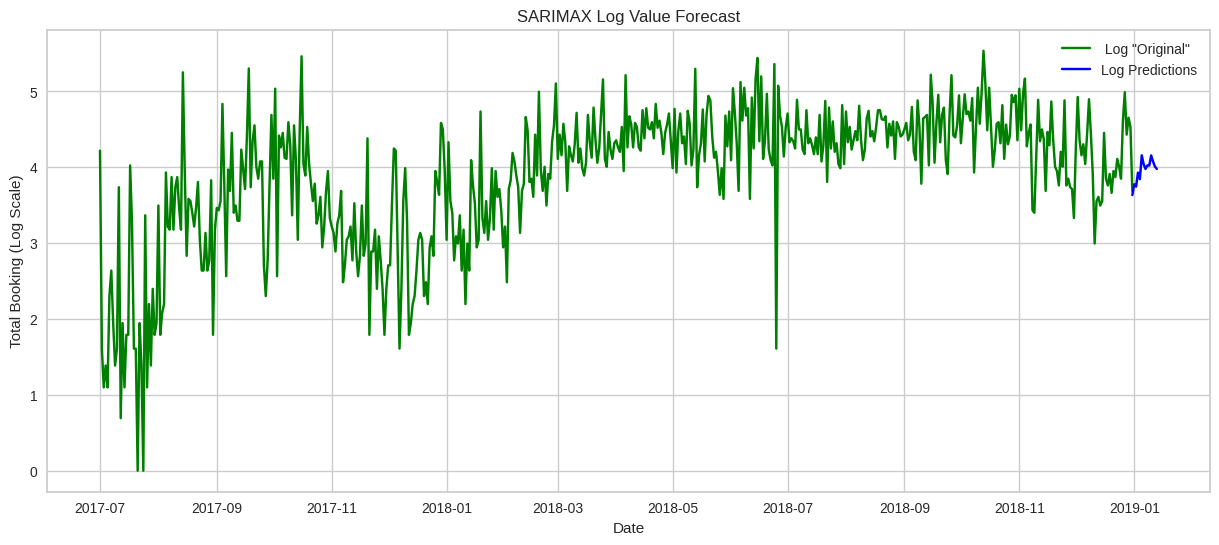

In [ ]:
# Predictions
forecast_log_sarimax = sarimax_results.forecast(steps=8)
predictions_SARIMAX = sarimax_results.get_forecast(steps=len(test))

# Confidence intervals for the predictions
pred_confidence = predictions_SARIMAX.conf_int()

# Extend the time index for predictions
future_index = pd.date_range(start=log_df.index[-1], periods=len(test), freq='D')

# Visualize the original time series (log) and the predictions
plt.figure(figsize=(15, 6))
plt.plot(log_df.index, log_df['log'], label=' Log "Original"', color='green')
plt.plot(future_index, predictions_SARIMAX.predicted_mean, color='blue', label='Log Predictions')
plt.xlabel('Date')
plt.ylabel('Total Booking (Log Scale)')
plt.title('SARIMAX Log Value Forecast')
plt.legend()
plt.show()

## Data Transformation

In [ ]:
# We transform the log data into the original one
forecast_arima_original = np.exp(forecast_log_arima)
forecast_sarimax_original = np.exp(forecast_log_sarimax)

## Results

### ARIMA

In [ ]:
forecast_arima_original

2018-12-18    41.955449
2018-12-19    50.866973
2018-12-20    51.036504
2018-12-21    45.246634
2018-12-22    52.620136
2018-12-23    60.078491
2018-12-24    50.302783
2018-12-25    51.738575
Freq: D, Name: predicted_mean, dtype: float64

### SARIMAX

In [ ]:
forecast_sarimax_original

2018-12-18    37.878104
2018-12-19    43.677953
2018-12-20    42.338314
2018-12-21    50.925403
2018-12-22    46.706222
2018-12-23    63.974948
2018-12-24    56.939671
2018-12-25    53.433521
Freq: D, Name: predicted_mean, dtype: float64

# Clustering

In [ ]:
data['total_guest'] = data['no_of_adults'] + data['no_of_children']

In [ ]:
clustering = data[['avg_price_per_room', 'lead_time','booking_status', 'total_guest']]
clustering['avg_price_per_room'] = clustering['avg_price_per_room'].astype(int)
clustering

<ipython-input-78-d3d39e9789b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering['avg_price_per_room'] = clustering['avg_price_per_room'].astype(int)


avg_price_per_room  lead_time  booking_status  total_guest
9776                  101        257               0            2
26321                 101        257               0            2
6450                  101        257               0            2
8762                   80        257               1            1
13727                 101        257               0            2
...                   ...        ...             ...          ...
10759                  75        331               0            2
30098                  70        240               0            2
10665                 102         42               1            3
5173                  208         20               1            2
10345                 118          7               1            2

[36238 rows x 4 columns]

## Elbow Analysis (Distortion)

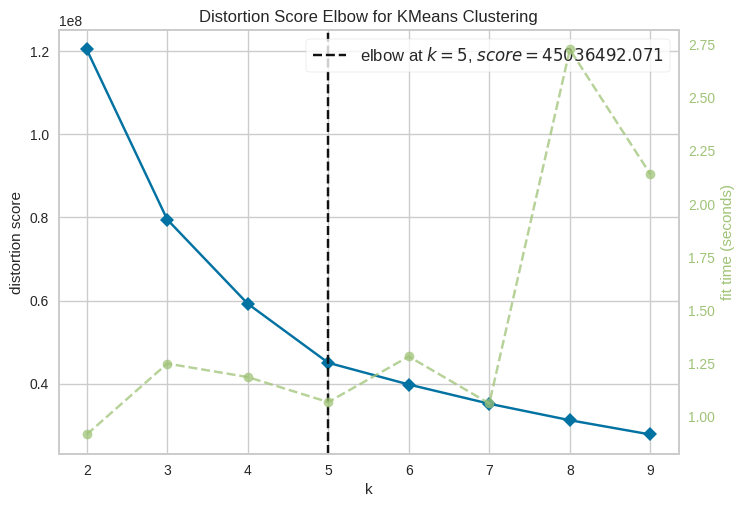

In [ ]:
model = KMeans(n_init=10, random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))
# We are using model k =(2,10) because it has the lowest score

visualizer.fit(clustering)
visualizer.show()
plt.show()

## Silhoutte Score

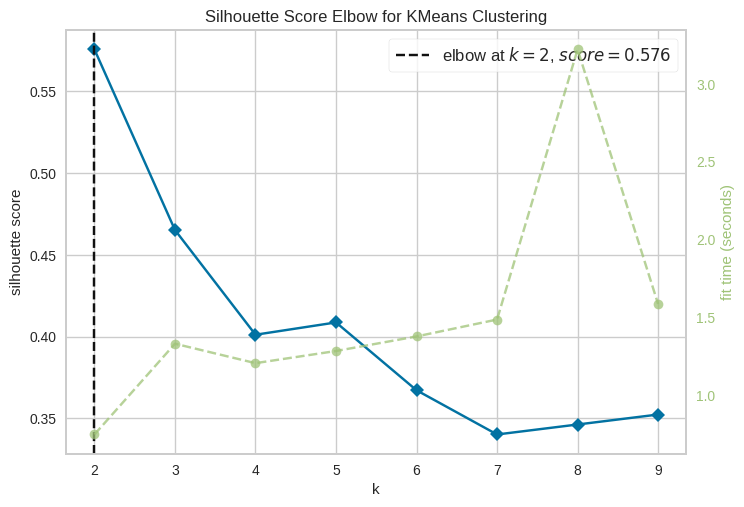

In [ ]:
model = KMeans(n_init=10, random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(clustering)
visualizer.show()
plt.show()

<ipython-input-81-9456c81a33b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering.loc[:, 'Labels'] = km5.labels_


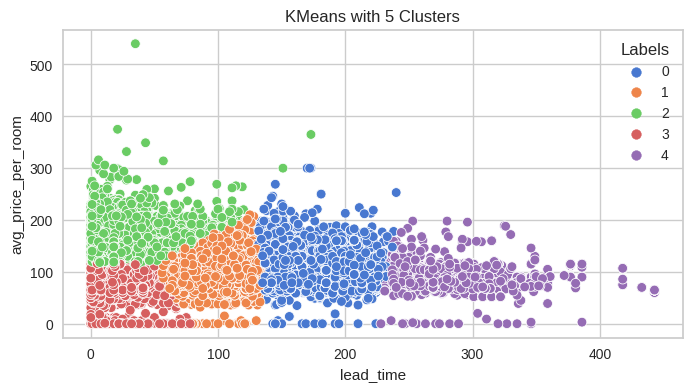

In [ ]:
# Plot 5 Clusters
km5 = KMeans(n_init= 10, n_clusters=5).fit(clustering)
clustering.loc[:, 'Labels'] = km5.labels_

# Create the scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x=clustering['lead_time'],
                y=clustering['avg_price_per_room'],
                hue=clustering['Labels'],
                palette=sns.color_palette('muted', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

<ipython-input-82-ed423eaa022f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering.loc[:, 'Labels'] = km2.labels_


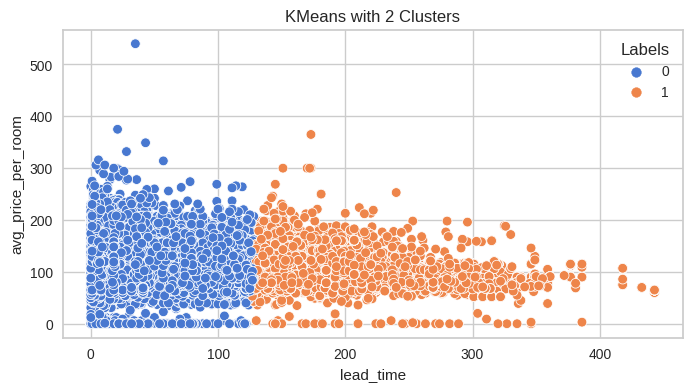

In [ ]:
# Plot 2 Clusters
km2 = KMeans(n_init= 10, n_clusters=2).fit(clustering)

# Add 'Labels' column using .loc
clustering.loc[:, 'Labels'] = km2.labels_

# Create the scatter plot
plt.figure(figsize=(8, 4))
sns.scatterplot(x=clustering['lead_time'],
                y=clustering['avg_price_per_room'],
                hue=clustering['Labels'],
                palette=sns.color_palette('muted',2))
plt.title('KMeans with 2 Clusters')
plt.show()

## Comparison

In [ ]:
# Compare with the silhoutte score
kmeans_2 = KMeans(n_clusters=2)
kmeans_2.fit(clustering)

kmeans_5 = KMeans(n_clusters=5)
kmeans_5.fit(clustering)

labels_5 = kmeans_5.labels_
labels_2 = kmeans_2.labels_

silhouette_score_5 = silhouette_score(clustering, labels_5)
silhouette_score_2 = silhouette_score(clustering, labels_2)
print(f"Silhouette Score for 5 clusters: {silhouette_score_5}")
print(f"Silhouette Score for 2 clusters: {silhouette_score_2}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score for 5 clusters: 0.4086244829606017
Silhouette Score for 2 clusters: 0.5755017282177972


## Results

In [ ]:
KM_5_clusters = KMeans(n_init=10, n_clusters=5, init='k-means++').fit(clustering)
KM_2_clusters = KMeans(n_init=10, n_clusters=2, init='k-means++').fit(clustering)

KM5_clustered = clustering.copy()
KM2_clustered = clustering.copy()

KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_
KM2_clustered.loc[:,'Cluster'] = KM_2_clusters.labels_

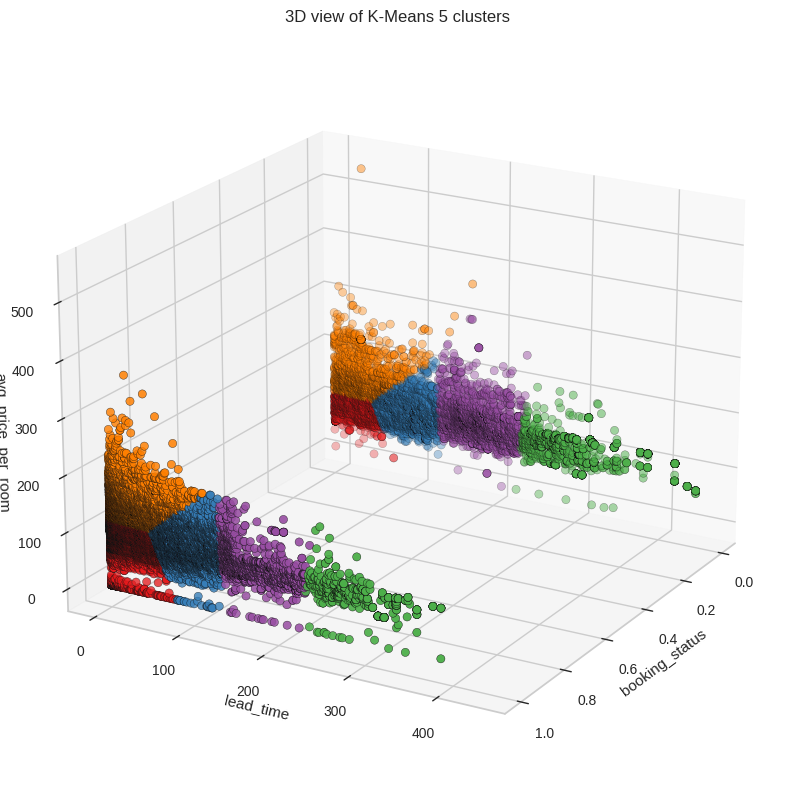

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

color_palette = sns.color_palette('Set1', len(KM_5_clusters.cluster_centers_))
cluster_colors = [color_palette[label] for label in KM5_clustered['Cluster']]

ax.scatter(KM5_clustered['booking_status'],
           KM5_clustered['lead_time'],
           KM5_clustered['avg_price_per_room'],
           c=cluster_colors,
           s=35, edgecolor='k')

ax.set_xlabel('booking_status')
ax.set_ylabel('lead_time')
ax.set_zlabel('avg_price_per_room')
ax.set_title('3D view of K-Means 5 clusters')
ax.view_init(elev=20, azim=30)

plt.show()

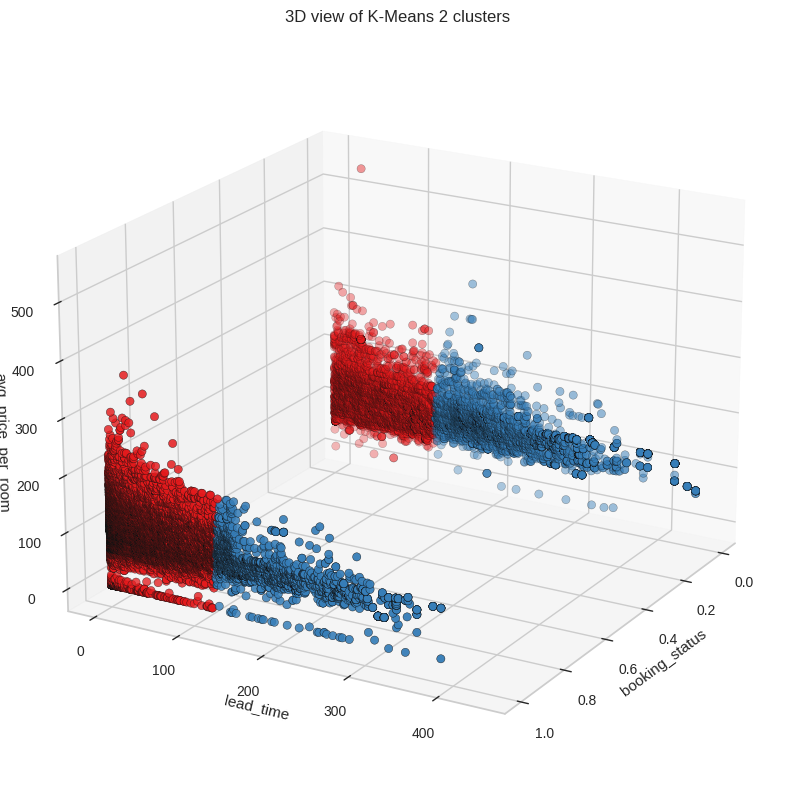

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

color_palette = sns.color_palette('Set1', len(KM_5_clusters.cluster_centers_))
cluster_colors = [color_palette[label] for label in KM2_clustered['Cluster']]

ax.scatter(KM2_clustered['booking_status'],
           KM2_clustered['lead_time'],
           KM2_clustered['avg_price_per_room'],
           c=cluster_colors,
           s=35, edgecolor='k')

ax.set_xlabel('booking_status')
ax.set_ylabel('lead_time')
ax.set_zlabel('avg_price_per_room')
ax.set_title('3D view of K-Means 2 clusters')
ax.view_init(elev=20, azim=30)

plt.show()

In [ ]:
def tracer(db, n, name):
    return go.Scatter3d(
        x = db[db['Cluster']==n]['booking_status'],
        y = db[db['Cluster']==n]['lead_time'],
        z = db[db['Cluster']==n]['avg_price_per_room'],
        mode = 'markers',
        name = name,
        marker = dict(size = 5))

In [ ]:
cluster_colors = [color_palette[label] for label in KM5_clustered['Cluster']]

trace0 = tracer(KM5_clustered, 0, 'Cluster 0')
trace1 = tracer(KM5_clustered, 1, 'Cluster 1')
trace2 = tracer(KM5_clustered, 2, 'Cluster 2')
trace3 = tracer(KM5_clustered, 3, 'Cluster 3')
trace4 = tracer(KM5_clustered, 4, 'Cluster 4')

data_3d = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Clusters by 5 Clusters K-Means',
    scene = dict(
            xaxis = dict(title = 'booking_status'),
            yaxis = dict(title = 'lead_time'),
            zaxis = dict(title = 'avg_price_per_room')))

fig = go.Figure(data=data_3d, layout=layout)
py.offline.iplot(fig)

We can analyze our 5 clusters in detail now:

- `Label 0` is low lead time and low average price per room
- `Label 1` is mid lead time and low average price per room
- `Label 2` is mid-low lead time and low average price per room
- `Label 3` is high lead time and low average price per room
- `Label 4` is low lead time and mid average price per room

In [ ]:
cluster_colors = [color_palette[label] for label in KM2_clustered['Cluster']]

trace0 = tracer(KM2_clustered, 0, 'Cluster 0')
trace1 = tracer(KM2_clustered, 1, 'Cluster 1')

data_3d = [trace0, trace1]

layout = go.Layout(
    title = 'Clusters by 2 Clusters K-Means',
    scene = dict(
            xaxis = dict(title = 'booking_status'),
            yaxis = dict(title = 'lead_time'),
            zaxis = dict(title = 'avg_price_per_room')))

fig = go.Figure(data=data_3d, layout=layout)
py.offline.iplot(fig)

We can analyze our 5 clusters in detail now:

- `Label 0` is low lead time and low average price per room
- `Label 1` is high lead time and low average price per room

# Modelling

In [ ]:
# Encode the string column
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

data_encoded = pd.get_dummies(data, columns=categorical_cols)
label_encoder = LabelEncoder()

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

## Random Forrest Classifier

In [ ]:
# Prepare features and target variable
X = data.drop(['Booking_ID', 'booking_status', 'date', 'day_of_week','month','total_guest'], axis=1)
y = data['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest Classifier Accuracy:", accuracy_rf)
print("Confusion Matrix (Random Forest):")
print(conf_matrix_rf)

Random Forest Classifier Accuracy: 0.8857615894039735
Confusion Matrix (Random Forest):
[[1898  508]
 [ 320 4522]]


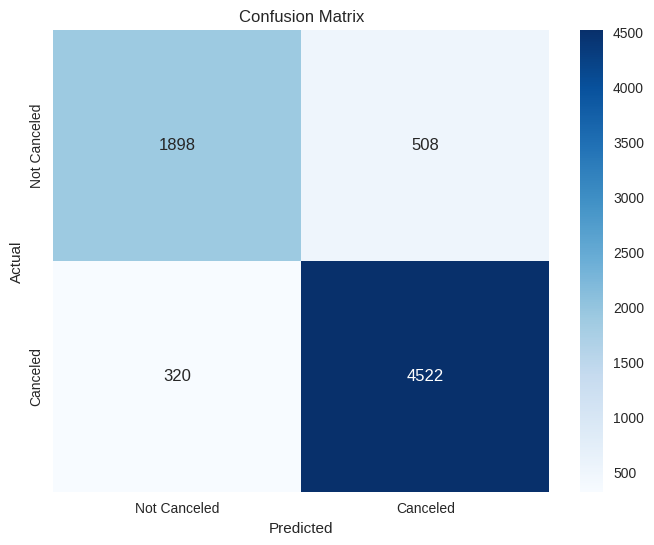

In [ ]:
# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]

    return vif

In [ ]:
checking_vif(X_train)

feature        VIF
0                           no_of_adults  15.916291
1                         no_of_children   1.349720
2                   no_of_weekend_nights   1.984171
3                      no_of_week_nights   3.645858
4                      type_of_meal_plan   1.404571
5             required_car_parking_space   1.065115
6                     room_type_reserved   1.849953
7                              lead_time   2.145479
8                    market_segment_type  23.994936
9                         repeated_guest   1.551651
10          no_of_previous_cancellations   1.322204
11  no_of_previous_bookings_not_canceled   1.635443
12                    avg_price_per_room  14.676721
13                no_of_special_requests   1.820493

In [ ]:
X_train = X_train.drop(['no_of_adults', 'market_segment_type', 'avg_price_per_room'], axis=1)

In [ ]:
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 0.8846389823415665
Recall: 0.8857615894039735
F1-score: 0.8845270332178371


## ROC AUC

AUC Score: 0.947839466115106


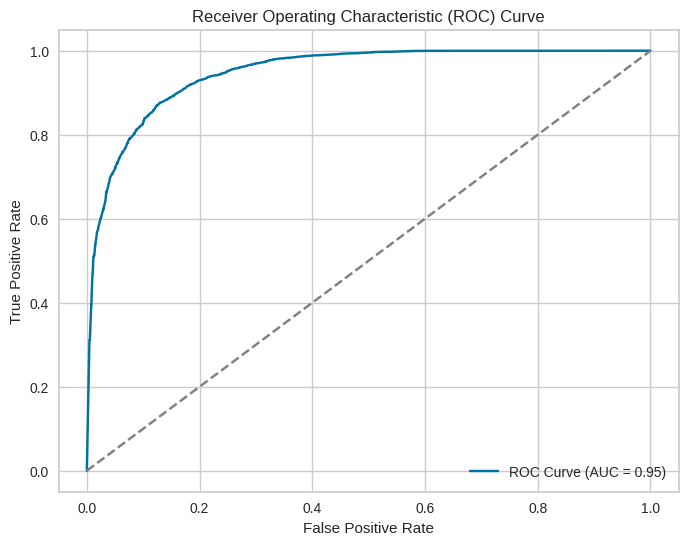

In [ ]:
# Calculate probabilities for the canceled
y_probs_rf = rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_rf)

# Calculate AUC score
auc = roc_auc_score(y_test, y_probs_rf)
print(f"AUC Score: {auc}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

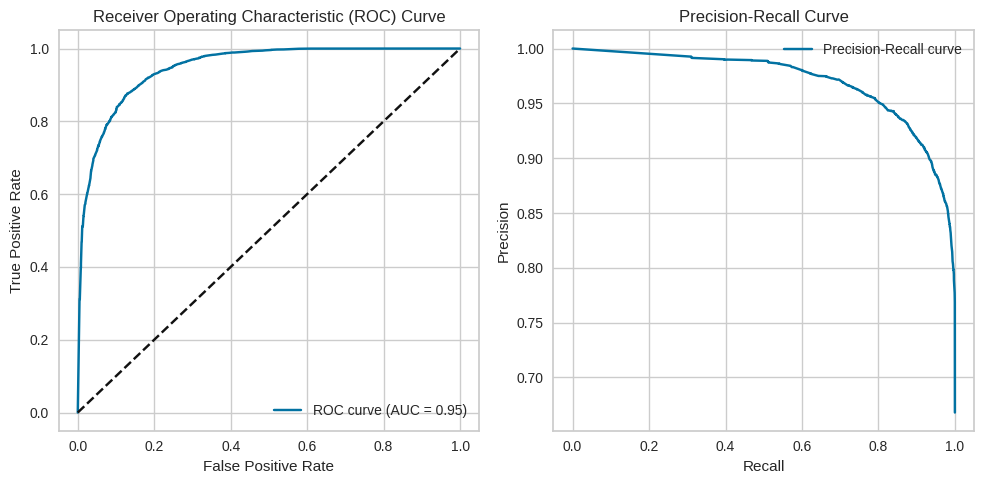

In [ ]:
# Let's try different threshold
custom_threshold = 0.37

# Obtain predictions based on the custom threshold
y_pred_custom = (y_probs_rf >= custom_threshold).astype(int)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs_rf)
auc = roc_auc_score(y_test, y_probs_rf)

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs_rf)

# Plot both ROC curve and Precision-Recall curve
plt.figure(figsize=(10, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

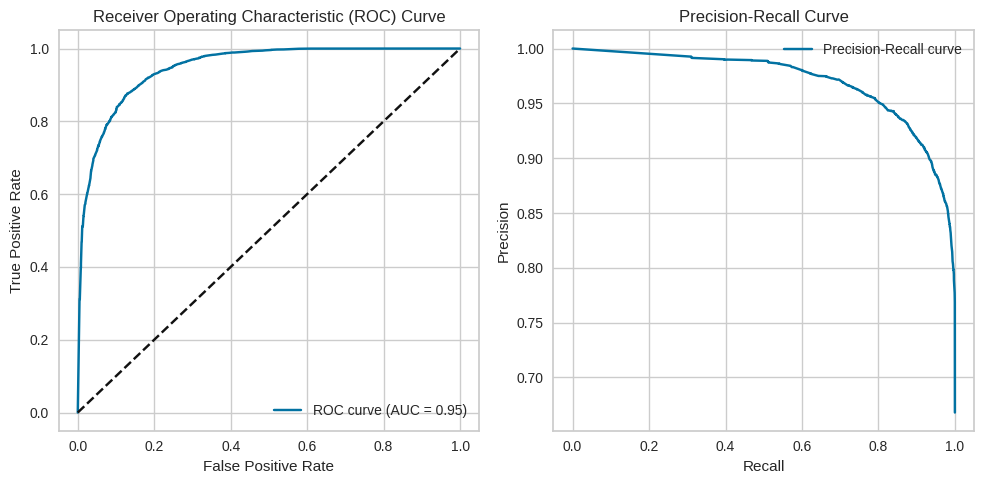

In [ ]:
# Let's try another threshold
custom_threshold = 0.42

# Obtain predictions based on the custom threshold
y_pred_custom = (y_probs_rf >= custom_threshold).astype(int)

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs_rf)
auc = roc_auc_score(y_test, y_probs_rf)

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs_rf)

# Plot both ROC curve and Precision-Recall curve
plt.figure(figsize=(10, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.tight_layout()
plt.show()

## Evaluate

In [ ]:
# Thresholds to evaluate
thresholds = [0.5, 0.37, 0.42]

# Calculate predictions and metrics for each threshold
predictions = {}
metrics = {}

for threshold in thresholds:
    predictions[threshold] = (y_probs_rf >= threshold).astype(int)
    metrics[threshold] = {
        'Accuracy': accuracy_score(y_test, predictions[threshold]),
        'Precision': precision_score(y_test, predictions[threshold]),
        'Recall': recall_score(y_test, predictions[threshold]),
        'F1-score': f1_score(y_test, predictions[threshold])}

print("Evaluation Metrics for Different Thresholds:")
for threshold, metric in metrics.items():
    print(f"Threshold: {threshold}")
    for metric_name, value in metric.items():
        print(f"{metric_name}: {value:.4f}")
    print()

Evaluation Metrics for Different Thresholds:
Threshold: 0.5
Accuracy: 0.8863
Precision: 0.8981
Recall: 0.9360
F1-score: 0.9167

Threshold: 0.37
Accuracy: 0.8827
Precision: 0.8750
Recall: 0.9618
F1-score: 0.9164

Threshold: 0.42
Accuracy: 0.8847
Precision: 0.8830
Recall: 0.9537
F1-score: 0.9170

